# Network-based Intrusion Detection System

A network-based intrusion detection system is an intrusion detection system, which is used to detect network-based intrusions

## Problem Description:

We have divided the task into two parts, 

#### Task 1:
 
 
· Build a network-based intrusion detection system model capable to predict intrusion or non-intrusion (Normal) signal.


##### Performance Metrices


· Recall (Most important for this case study because of imbalances of class labels)

· Precision

· F1 Score

· AUC

· Binary Confusion Matrix

*******************************************************************

#### Task 2:
 - - - 
· If first model predicts any intrusion signal, then this model will predict which type of intrusion it will be.
There are 4 types of Intrusion attacks, as mentioned below, 

1. DOS: denial-of-service, e.g., syn flood;

2. R2L: unauthorized access from a remote machine, e.g., guessing password;

3. U2R: unauthorized access to local superuser (root) privileges, e.g., various ``buffer overflow'' attacks;

4. Probing: surveillance and other probing, e.g., port scanning.


##### Performance Metrices


· Log loss

· Misclassificatin Points

· Multiclass Recall

· Multiclass Precession

· Multiclass Confusion Matrix

## Data Description:


The 1998 DARPA Intrusion Detection Evaluation Program was prepared and managed by MIT Lincoln Labs. The objective was to survey and evaluate research in intrusion detection.  A standard set of data to be audited, which includes a wide variety of intrusions simulated in a military network environment, was provided.  The 1999 KDD intrusion detection contest uses a version of this dataset.

Lincoln Labs set up an environment to acquire nine weeks of raw TCP dump data for a local-area network (LAN) simulating a typical U.S. Air Force LAN.  They operated the LAN as if it were a true Air Force environment, but peppered it with multiple attacks.

The raw training data was about four gigabytes of compressed binary TCP dump data from seven weeks of network traffic.  This was processed into about five million connection records.  Similarly, the two weeks of test data yielded around two million connection records.

A connection is a sequence of TCP packets starting and ending at some well defined times, between which data flows to and from a source IP address to a target IP address under some well defined protocol.  Each connection is labeled as either normal, or as an attack, with exactly one specific attack type.  Each connection record consists of about 100 bytes.




In this case study there are total 3 types of features are present as mentioned below -  

 
     * Table 1: Basic features of individual TCP connections
![Table 1: Basic features of individual TCP connections](pic1.png)


     * Table 2: Content features within a connection suggested by domain knowledge
![Table 2: Content features within a connection suggested by domain knowledge](pic2.png)


     * Table 3: Traffic features computed using a two-second time window
![Table 3: Traffic features computed using a two-second time window](pic3.png)

<h6> Reference </h6>

- http://kdd.ics.uci.edu/databases/kddcup99/kddcup99.html

- https://arxiv.org/pdf/1903.02460.pdf


## Performance Metrics:

<h6> 1. Confusion Matrix </h6> [Although it is an imbalanced dataset and I can't directly rely on Confusion Matrix. But for the experimental prospects, I have used it for fixing the imbalanced dataset using oversampling and under-sampling] 

 * The matrix compares the actual target values with those predicted by the machine learning model.

![Confusion Matrix](pic4.png)



<h6> True Positive (TP) </h6> 

 * The predicted value matches the actual value. The actual value was positive and the model predicted a positive value

<h6> True Negative (TN) </h6> 

 * The predicted value matches the actual value. The actual value was negative and the model predicted a negative value

<h6> False Positive (FP) – Type 1 error </h6>

 * The predicted value was falsely predicted. The actual value was negative but the model predicted a positive value

<h6> False Negative (FN) – Type 2 error </h6> 

 * The predicted value was falsely predicted. The actual value was positive but the model predicted a negative value


#### In this multi class problem or task 2, I built 4 x 4 (N x N) confusion matix.


<h6> 2. Precision </h6> [ It is very useful for imbalanced data ]

   * Precision tells us how many of the correctly predicted cases actually turned out to be positive.
   * Precision is a useful metric in cases where False Positive is a higher concern than False Negatives.
   
   ![Precision](pic5.png)
   

<h6> 3. Recall/Sensitivity </h6> [ It is very useful for imbalanced data ]

   * Recall tells us how many of the actual positive cases we were able to predict correctly with our model.
   * The recall is a useful metric in cases where False Negative is a higher concern than False Positive.
   
   ![Recall](pic6.png)

<h6> 4. F1-Score </h6>

   * F1-score is a harmonic mean of Precision and Recall, and so it gives a combined idea about these two metrics. It is maximum when Precision is equal to Recall. 
   
   * when we try to increase the precision of our model, the recall goes down, and vice-versa. The F1-score captures both the trends in a single value
   
   ![F1-Score](pic7.png)

<h5> 5. AUC-ROC </h5>

<h6> Sensitivity / True Positive Rate / Recall (TPR) </h6>
  
  * Sensitivity tells us what proportion of the positive class got correctly classified.

![F1-Score](pic71.png)

<h6> False Negative Rate </h6>

   * False Negative Rate (FNR) tells us what proportion of the positive class got incorrectly classified by the classifier.

![F1-Score](pic72.png)

<h6> Specificity / True Negative Rate </h6>

   * Specificity tells us what proportion of the negative class got correctly classified.

![F1-Score](pic73.png)

<h6> False Positive Rate (FPR)  </h6>
    
   * FPR tells us what proportion of the negative class got incorrectly classified by the classifier.
![F1-Score](pic74.png)



<h6> AUC-ROC curve </h6>

  * The Receiver Operator Characteristic (ROC) curve is an evaluation metric for binary classification problems. 
  
  * It is a probability curve that plots the TPR against FPR at various threshold values and essentially separates the ‘signal’ from the ‘noise’. 
  
  * The Area Under the Curve (AUC) is the measure of the ability of a classifier to distinguish between classes and is used as a summary of the ROC curve.
  
  * The higher the AUC, the better the performance of the model at distinguishing between the positive and negative classes.
  
  

## Notebook Content:


###### 1. 1_CS1_EDA_AND_DATA_CLEAN_v1 -> I have done all the Data Cleaning and Exploratory Data Analysis part in this notebook.

###### 2. 2_CS1_FE_&_BINARY_MODEL_v1 -> I have done all the Features Engineering for bindary classification and Binary classification model in this notebook.

###### 3. 3_CS1_FE_&_MULTICLASS_MODEL_v1 -> I have done all the Features Engineering for multiclass classification and Multiclass classification model in this notebook.

<h1> Import Libraries </h1>

In [1]:
import pandas as pd
import seaborn as sns
import numpy as np
from matplotlib import pyplot as plt

from sklearn.manifold import TSNE
from sklearn import decomposition

from collections import Counter

# to display all column of datapoints
pd.set_option('display.max_columns', None)

<h1> Data Load </h1>

In [2]:
# changing all the columns name

column_name =  ["duration","protocol_type","service","flag","src_bytes",
    "dst_bytes","land","wrong_fragment","urgent","hot","num_failed_logins",
    "logged_in","num_compromised","root_shell","su_attempted","num_root",
    "num_file_creations","num_shells","num_access_files","num_outbound_cmds",
    "is_host_login","is_guest_login","count","srv_count","serror_rate",
    "srv_serror_rate","rerror_rate","srv_rerror_rate","same_srv_rate",
    "diff_srv_rate","srv_diff_host_rate","dst_host_count","dst_host_srv_count",
    "dst_host_same_srv_rate","dst_host_diff_srv_rate","dst_host_same_src_port_rate",
    "dst_host_srv_diff_host_rate","dst_host_serror_rate","dst_host_srv_serror_rate",
    "dst_host_rerror_rate","dst_host_srv_rerror_rate","class_label"]


In [3]:
#loading train dataset

df_train=pd.read_csv('kddcup.data.corrected.csv' ,  names=column_name)

df_train.head(10)

,duration,protocol_type,service,flag,src_bytes,dst_bytes,land,wrong_fragment,urgent,hot,num_failed_logins,logged_in,num_compromised,root_shell,su_attempted,num_root,num_file_creations,num_shells,num_access_files,num_outbound_cmds,is_host_login,is_guest_login,count,srv_count,serror_rate,srv_serror_rate,rerror_rate,srv_rerror_rate,same_srv_rate,diff_srv_rate,srv_diff_host_rate,dst_host_count,dst_host_srv_count,dst_host_same_srv_rate,dst_host_diff_srv_rate,dst_host_same_src_port_rate,dst_host_srv_diff_host_rate,dst_host_serror_rate,dst_host_srv_serror_rate,dst_host_rerror_rate,dst_host_srv_rerror_rate,class_label
0,0,tcp,http,SF,215,45076,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,1,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0,0,0.0,0.0,0.00,0.0,0.0,0.0,0.0,0.0,normal.
1,0,tcp,http,SF,162,4528,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,2,2,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1,1,1.0,0.0,1.00,0.0,0.0,0.0,0.0,0.0,normal.
2,0,tcp,http,SF,236,1228,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,1,0.0,0.0,0.0,0.0,1.0,0.0,0.0,2,2,1.0,0.0,0.50,0.0,0.0,0.0,0.0,0.0,normal.
3,0,tcp,http,SF,233,2032,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,2,2,0.0,0.0,0.0,0.0,1.0,0.0,0.0,3,3,1.0,0.0,0.33,0.0,0.0,0.0,0.0,0.0,normal.
4,0,tcp,http,SF,239,486,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,3,3,0.0,0.0,0.0,0.0,1.0,0.0,0.0,4,4,1.0,0.0,0.25,0.0,0.0,0.0,0.0,0.0,normal.
5,0,tcp,http,SF,238,1282,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,4,4,0.0,0.0,0.0,0.0,1.0,0.0,0.0,5,5,1.0,0.0,0.20,0.0,0.0,0.0,0.0,0.0,normal.
6,0,tcp,http,SF,235,1337,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,5,5,0.0,0.0,0.0,0.0,1.0,0.0,0.0,6,6,1.0,0.0,0.17,0.0,0.0,0.0,0.0,0.0,normal.
7,0,tcp,http,SF,234,1364,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,6,6,0.0,0.0,0.0,0.0,1.0,0.0,0.0,7,7,1.0,0.0,0.14,0.0,0.0,0.0,0.0,0.0,normal.
8,0,tcp,http,SF,239,1295,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,7,7,0.0,0.0,0.0,0.0,1.0,0.0,0.0,8,8,1.0,0.0,0.12,0.0,0.0,0.0,0.0,0.0,normal.
9,0,tcp,http,SF,181,5450,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,8,8,0.0,0.0,0.0,0.0,1.0,0.0,0.0,9,9,1.0,0.0,0.11,0.0,0.0,0.0,0.0,0.0,normal.


In [4]:
#loading test dataset

df_test=pd.read_csv('corrected.csv' ,  names=column_name)

df_test.head(10)

,duration,protocol_type,service,flag,src_bytes,dst_bytes,land,wrong_fragment,urgent,hot,num_failed_logins,logged_in,num_compromised,root_shell,su_attempted,num_root,num_file_creations,num_shells,num_access_files,num_outbound_cmds,is_host_login,is_guest_login,count,srv_count,serror_rate,srv_serror_rate,rerror_rate,srv_rerror_rate,same_srv_rate,diff_srv_rate,srv_diff_host_rate,dst_host_count,dst_host_srv_count,dst_host_same_srv_rate,dst_host_diff_srv_rate,dst_host_same_src_port_rate,dst_host_srv_diff_host_rate,dst_host_serror_rate,dst_host_srv_serror_rate,dst_host_rerror_rate,dst_host_srv_rerror_rate,class_label
0,0,udp,private,SF,105,146,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,1,0.0,0.0,0.0,0.0,1.0,0.0,0.0,255,254,1.00,0.01,0.00,0.00,0.0,0.0,0.0,0.0,normal.
1,0,udp,private,SF,105,146,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,1,0.0,0.0,0.0,0.0,1.0,0.0,0.0,255,254,1.00,0.01,0.00,0.00,0.0,0.0,0.0,0.0,normal.
2,0,udp,private,SF,105,146,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,1,0.0,0.0,0.0,0.0,1.0,0.0,0.0,255,254,1.00,0.01,0.00,0.00,0.0,0.0,0.0,0.0,normal.
3,0,udp,private,SF,105,146,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,2,2,0.0,0.0,0.0,0.0,1.0,0.0,0.0,255,254,1.00,0.01,0.00,0.00,0.0,0.0,0.0,0.0,snmpgetattack.
4,0,udp,private,SF,105,146,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,2,2,0.0,0.0,0.0,0.0,1.0,0.0,0.0,255,254,1.00,0.01,0.01,0.00,0.0,0.0,0.0,0.0,snmpgetattack.
5,0,udp,private,SF,105,146,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,2,2,0.0,0.0,0.0,0.0,1.0,0.0,0.0,255,255,1.00,0.00,0.01,0.00,0.0,0.0,0.0,0.0,snmpgetattack.
6,0,udp,domain_u,SF,29,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,2,1,0.0,0.0,0.0,0.0,0.5,1.0,0.0,10,3,0.30,0.30,0.30,0.00,0.0,0.0,0.0,0.0,normal.
7,0,udp,private,SF,105,146,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,1,0.0,0.0,0.0,0.0,1.0,0.0,0.0,255,253,0.99,0.01,0.00,0.00,0.0,0.0,0.0,0.0,normal.
8,0,udp,private,SF,105,146,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,2,2,0.0,0.0,0.0,0.0,1.0,0.0,0.0,255,254,1.00,0.01,0.00,0.00,0.0,0.0,0.0,0.0,snmpgetattack.
9,0,tcp,http,SF,223,185,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,4,4,0.0,0.0,0.0,0.0,1.0,0.0,0.0,71,255,1.00,0.00,0.01,0.01,0.0,0.0,0.0,0.0,normal.


<h2> Basic observation on dataset and Data Cleaning </h2>

In [5]:
#check no. of rows and columns present in dataframe

df_train.shape

(4898431, 42)

In [6]:
#check no. of rows and columns present in dataframe

df_test.shape

(311029, 42)

In [7]:
#Counting the datatypes of columns for train dataset

Counter(df_train.dtypes)

Counter({dtype('int64'): 23, dtype('O'): 4, dtype('float64'): 15})

In [8]:
#Counting the datatypes of columns for test dataset

Counter(df_test.dtypes)

Counter({dtype('int64'): 23, dtype('O'): 4, dtype('float64'): 15})

In [9]:
"""  Understand the dataset , all the data types of the columns, 
any null values are present in the particular columns or not and
memory usuage of the dataset"""

df_train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4898431 entries, 0 to 4898430
Data columns (total 42 columns):
 #   Column                       Dtype  
---  ------                       -----  
 0   duration                     int64  
 1   protocol_type                object 
 2   service                      object 
 3   flag                         object 
 4   src_bytes                    int64  
 5   dst_bytes                    int64  
 6   land                         int64  
 7   wrong_fragment               int64  
 8   urgent                       int64  
 9   hot                          int64  
 10  num_failed_logins            int64  
 11  logged_in                    int64  
 12  num_compromised              int64  
 13  root_shell                   int64  
 14  su_attempted                 int64  
 15  num_root                     int64  
 16  num_file_creations           int64  
 17  num_shells                   int64  
 18  num_access_files             int64  
 19  

In [10]:
"""  Understand the dataset , all the data types of the columns, 
any null values are present in the particular columns or not and
memory usuage of the dataset"""

df_test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 311029 entries, 0 to 311028
Data columns (total 42 columns):
 #   Column                       Non-Null Count   Dtype  
---  ------                       --------------   -----  
 0   duration                     311029 non-null  int64  
 1   protocol_type                311029 non-null  object 
 2   service                      311029 non-null  object 
 3   flag                         311029 non-null  object 
 4   src_bytes                    311029 non-null  int64  
 5   dst_bytes                    311029 non-null  int64  
 6   land                         311029 non-null  int64  
 7   wrong_fragment               311029 non-null  int64  
 8   urgent                       311029 non-null  int64  
 9   hot                          311029 non-null  int64  
 10  num_failed_logins            311029 non-null  int64  
 11  logged_in                    311029 non-null  int64  
 12  num_compromised              311029 non-null  int64  
 13 

#### Observation

* I can see in both the train and test datasets are taking huge memory usages. 

In [11]:
## This function will reduce the occupied memory usage

def memory_reduce(df):
    
    #Taking all the column for the dataframe one by one
    for col in df:
        
        #Compairing the datatype of the column
        if df[col].dtype == "float64":
            
            #using downcasting loop to the reduce the size of the datatype of the columns to reduce the occupied memory usuage
            df[col]=pd.to_numeric(df[col], downcast="float")
        
        if df[col].dtype == "int64":
            
            df[col]=pd.to_numeric(df[col], downcast="integer")
            
    
    return df

In [12]:
df_train=memory_reduce(df_train)

df_test=memory_reduce(df_test)

In [13]:
df_train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4898431 entries, 0 to 4898430
Data columns (total 42 columns):
 #   Column                       Dtype  
---  ------                       -----  
 0   duration                     int32  
 1   protocol_type                object 
 2   service                      object 
 3   flag                         object 
 4   src_bytes                    int32  
 5   dst_bytes                    int32  
 6   land                         int8   
 7   wrong_fragment               int8   
 8   urgent                       int8   
 9   hot                          int8   
 10  num_failed_logins            int8   
 11  logged_in                    int8   
 12  num_compromised              int16  
 13  root_shell                   int8   
 14  su_attempted                 int8   
 15  num_root                     int16  
 16  num_file_creations           int8   
 17  num_shells                   int8   
 18  num_access_files             int8   
 19  

In [14]:
df_test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 311029 entries, 0 to 311028
Data columns (total 42 columns):
 #   Column                       Non-Null Count   Dtype  
---  ------                       --------------   -----  
 0   duration                     311029 non-null  int32  
 1   protocol_type                311029 non-null  object 
 2   service                      311029 non-null  object 
 3   flag                         311029 non-null  object 
 4   src_bytes                    311029 non-null  int32  
 5   dst_bytes                    311029 non-null  int32  
 6   land                         311029 non-null  int8   
 7   wrong_fragment               311029 non-null  int8   
 8   urgent                       311029 non-null  int8   
 9   hot                          311029 non-null  int8   
 10  num_failed_logins            311029 non-null  int8   
 11  logged_in                    311029 non-null  int8   
 12  num_compromised              311029 non-null  int16  
 13 

#### Observation

* Memory usage of both the dataset have been reduced significantly.

In [15]:
""" checking null values present in this train dataset or not """

df_train.isnull().sum()

duration                       0
protocol_type                  0
service                        0
flag                           0
src_bytes                      0
dst_bytes                      0
land                           0
wrong_fragment                 0
urgent                         0
hot                            0
num_failed_logins              0
logged_in                      0
num_compromised                0
root_shell                     0
su_attempted                   0
num_root                       0
num_file_creations             0
num_shells                     0
num_access_files               0
num_outbound_cmds              0
is_host_login                  0
is_guest_login                 0
count                          0
srv_count                      0
serror_rate                    0
srv_serror_rate                0
rerror_rate                    0
srv_rerror_rate                0
same_srv_rate                  0
diff_srv_rate                  0
srv_diff_h

In [16]:
""" checking null values present in this test dataset or not """

df_test.isnull().sum()

duration                       0
protocol_type                  0
service                        0
flag                           0
src_bytes                      0
dst_bytes                      0
land                           0
wrong_fragment                 0
urgent                         0
hot                            0
num_failed_logins              0
logged_in                      0
num_compromised                0
root_shell                     0
su_attempted                   0
num_root                       0
num_file_creations             0
num_shells                     0
num_access_files               0
num_outbound_cmds              0
is_host_login                  0
is_guest_login                 0
count                          0
srv_count                      0
serror_rate                    0
srv_serror_rate                0
rerror_rate                    0
srv_rerror_rate                0
same_srv_rate                  0
diff_srv_rate                  0
srv_diff_h

#### Observation

* There are no null values present in both the datasets.

In [21]:
""" In the step I am removing duplicate rows from the train dataset, 
    keep=False means Drop all duplicates.
    inplace=True whether to drop duplicates """

df_train.drop_duplicates(keep=False,inplace=True)

df_train.shape

(950470, 42)

In [23]:
""" In the step I am removing duplicate rows from the test dataset, 
    keep=False means Drop all duplicates.
    inplace=True whether to drop duplicates """

df_test.drop_duplicates(keep=False,inplace=True)

df_test.shape

(66436, 42)

#### Observation

* Duplicate values have been cleared from the datasets.


In [24]:
""" Saved the both cleaned dataset """

df_train.to_csv("cleaned_train.csv", index=False)
df_test.to_csv("cleaned_test.csv", index=False)

Overall Observation
-----------------------------

* There are total of 42 features present in both the dataset

* Train dataset has 950470 data and the memory usage is around 608 MB (initially 15 GB).

* The test dataset has 66436 data and the memory usage is around 39 MB (initially 1 GB).

* No null values and duplicate values have not found in both dataset.

<h2> Exploratory Data Analysis </h2>

In [25]:
# Descriptive analysis of the data

df_train.describe()

,duration,src_bytes,dst_bytes,land,wrong_fragment,urgent,hot,num_failed_logins,logged_in,num_compromised,root_shell,su_attempted,num_root,num_file_creations,num_shells,num_access_files,num_outbound_cmds,is_host_login,is_guest_login,count,srv_count,serror_rate,srv_serror_rate,rerror_rate,srv_rerror_rate,same_srv_rate,diff_srv_rate,srv_diff_host_rate,dst_host_count,dst_host_srv_count,dst_host_same_srv_rate,dst_host_diff_srv_rate,dst_host_same_src_port_rate,dst_host_srv_diff_host_rate,dst_host_serror_rate,dst_host_srv_serror_rate,dst_host_rerror_rate,dst_host_srv_rerror_rate
count,950470.000000,9.504700e+05,9.504700e+05,950470.000000,950470.000000,950470.000000,950470.000000,950470.000000,950470.000000,950470.000000,950470.000000,950470.000000,950470.000000,950470.000000,950470.000000,950470.000000,950470.0,950470.000000,950470.000000,950470.000000,950470.000000,950470.000000,950470.000000,950470.000000,950470.000000,950470.000000,950470.000000,950470.000000,950470.000000,950470.000000,950470.000000,950470.000000,950470.000000,950470.000000,950470.000000,950470.000000,950470.000000,950470.000000
mean,135.066689,6.588029e+03,5.440756e+03,0.000025,0.002849,0.000041,0.061045,0.000165,0.694595,0.040251,0.000335,0.000189,0.066320,0.006126,0.000383,0.004617,0.0,0.000002,0.004298,38.621862,13.172987,0.140866,0.141394,0.064121,0.064136,0.835734,0.026931,0.130063,151.909879,171.647058,0.722127,0.044198,0.095375,0.023028,0.141513,0.140701,0.065862,0.064949
std,1351.217829,2.137206e+06,1.464282e+06,0.005025,0.090591,0.016379,1.060130,0.016570,0.460579,8.754734,0.018288,0.018348,8.939779,0.281870,0.019833,0.076399,0.0,0.001451,0.065417,76.062100,29.783326,0.346695,0.347160,0.243238,0.242071,0.348579,0.114015,0.274869,102.363286,104.916376,0.399954,0.123387,0.226343,0.054918,0.346432,0.347302,0.237647,0.237212
min,0.000000,0.000000e+00,0.000000e+00,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.000000,4.400000e+01,0.000000e+00,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.000000,0.000000,1.000000,2.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,43.000000,47.000000,0.350000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,0.000000,2.280000e+02,3.780000e+02,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.000000,0.000000,6.000000,7.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,170.000000,255.000000,1.000000,0.000000,0.010000,0.010000,0.000000,0.000000,0.000000,0.000000
75%,0.000000,3.130000e+02,2.022000e+03,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.000000,0.000000,20.000000,15.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.120000,255.000000,255.000000,1.000000,0.050000,0.050000,0.030000,0.000000,0.000000,0.000000,0.000000
max,58329.000000,1.379964e+09,1.309937e+09,1.000000,3.000000,14.000000,77.000000,5.000000,1.000000,7479.000000,1.000000,2.000000,7468.000000,43.000000,2.000000,9.000000,0.0,1.000000,1.000000,511.000000,511.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,255.000000,255.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


In [26]:
# Descriptive analysis of the data

df_test.describe()

,duration,src_bytes,dst_bytes,land,wrong_fragment,urgent,hot,num_failed_logins,logged_in,num_compromised,root_shell,su_attempted,num_root,num_file_creations,num_shells,num_access_files,num_outbound_cmds,is_host_login,is_guest_login,count,srv_count,serror_rate,srv_serror_rate,rerror_rate,srv_rerror_rate,same_srv_rate,diff_srv_rate,srv_diff_host_rate,dst_host_count,dst_host_srv_count,dst_host_same_srv_rate,dst_host_diff_srv_rate,dst_host_same_src_port_rate,dst_host_srv_diff_host_rate,dst_host_serror_rate,dst_host_srv_serror_rate,dst_host_rerror_rate,dst_host_srv_rerror_rate
count,66436.000000,6.643600e+04,6.643600e+04,66436.000000,66436.000000,66436.000000,66436.000000,66436.000000,66436.000000,66436.000000,66436.000000,66436.000000,66436.000000,66436.000000,66436.000000,66436.000000,66436.0,66436.000000,66436.000000,66436.000000,66436.000000,66436.000000,66436.000000,66436.000000,66436.000000,66436.000000,66436.000000,66436.000000,66436.000000,66436.000000,66436.000000,66436.000000,66436.000000,66436.000000,66436.000000,66436.000000,66436.000000,66436.000000
mean,82.041378,3.644476e+03,3.308429e+03,0.000135,0.002649,0.000241,0.042266,0.006668,0.672557,0.039993,0.000933,0.000105,0.039135,0.004486,0.000391,0.003582,0.0,0.000181,0.010883,51.461798,18.156075,0.078347,0.079051,0.143108,0.141882,0.811882,0.041215,0.111244,166.700539,176.527892,0.736012,0.040952,0.079630,0.017300,0.076426,0.077372,0.141798,0.138734
std,878.816452,2.754066e+05,3.473643e+04,0.011638,0.081892,0.021249,0.634301,0.085358,0.469284,4.235658,0.030535,0.012867,4.684752,0.417836,0.027974,0.063413,0.0,0.013439,0.103752,95.018078,51.560952,0.261432,0.264997,0.343342,0.343921,0.372553,0.161982,0.242625,101.985147,105.590306,0.402115,0.131054,0.219455,0.049623,0.251248,0.258169,0.329755,0.336198
min,0.000000,0.000000e+00,0.000000e+00,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.000000,2.800000e+01,0.000000e+00,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.000000,0.000000,2.000000,3.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,54.000000,47.000000,0.340000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,0.000000,2.240000e+02,4.190000e+02,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.000000,0.000000,8.000000,8.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,255.000000,255.000000,1.000000,0.000000,0.010000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,0.000000,3.030000e+02,2.239000e+03,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.000000,0.000000,28.000000,16.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.110000,255.000000,255.000000,1.000000,0.040000,0.030000,0.020000,0.000000,0.000000,0.000000,0.000000
max,57715.000000,6.282565e+07,5.203179e+06,1.000000,3.000000,3.000000,101.000000,4.000000,1.000000,796.000000,1.000000,2.000000,878.000000,100.000000,5.000000,4.000000,0.0,1.000000,1.000000,511.000000,511.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,255.000000,255.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


<h2> Overall distribution of Intrusion and non-intrusion signal</h2>

<h6> Train dataset </h6>

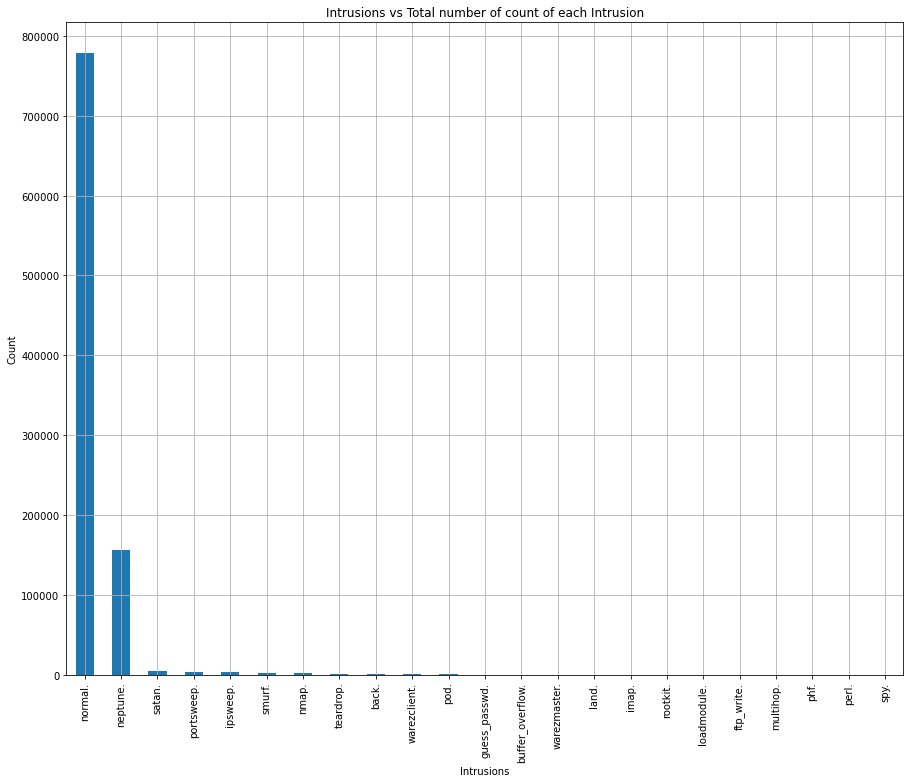

In [27]:
#Create a new figure
plt.figure(figsize=(15,12))
#taking all the count vales
val = df_train['class_label'].value_counts()
#To print bar plot
val.plot(kind='bar')
#Y axis name
plt.ylabel('Count')
#x axis name
plt.xlabel('Intrusions')
#title of the plot
plt.title('Intrusions vs Total number of count of each Intrusion')
#Create grid
plt.grid()
#Show the plot
plt.show()

#### Observation


* In the barplot of individual Intrusions, the Normal signal or the Non-Intrusion type signal is very large numbers compared to other Intrusions.

<h6>  Checking the individual intrusion count from class_label column in the train dataset  </h6>

In [28]:
cls_tr=df_train['class_label'].value_counts().index.tolist()
val_tr=df_train['class_label'].value_counts()

print(" Total types of Intrusion" , len(val_tr))
print("**" *50)

print(" Name of the Intrusion and the total number of count of it ")
print("**" *50)

x = np.argsort(-val_tr.values)
for i in x:
    print( cls_tr[i], ':',val_tr.values[i],'(', np.round((val_tr.values[i]/len(df_train)*100), 3), '%)')
    





 Total types of Intrusion 23
****************************************************************************************************
 Name of the Intrusion and the total number of count of it 
****************************************************************************************************
normal. : 778417 ( 81.898 %)
neptune. : 155549 ( 16.365 %)
satan. : 3836 ( 0.404 %)
portsweep. : 3214 ( 0.338 %)
ipsweep. : 2717 ( 0.286 %)
smurf. : 2362 ( 0.249 %)
nmap. : 1523 ( 0.16 %)
teardrop. : 857 ( 0.09 %)
back. : 838 ( 0.088 %)
warezclient. : 830 ( 0.087 %)
pod. : 152 ( 0.016 %)
guess_passwd. : 53 ( 0.006 %)
buffer_overflow. : 30 ( 0.003 %)
warezmaster. : 20 ( 0.002 %)
land. : 17 ( 0.002 %)
imap. : 12 ( 0.001 %)
rootkit. : 10 ( 0.001 %)
loadmodule. : 9 ( 0.001 %)
ftp_write. : 8 ( 0.001 %)
multihop. : 7 ( 0.001 %)
phf. : 4 ( 0.0 %)
perl. : 3 ( 0.0 %)
spy. : 2 ( 0.0 %)


#### Observation 

* In the above code, there are 22 type of intrusions and 1 Normal or Non-intrusion type signal.

* Normal or Non-intrusion type signal has 85% datapoints.

* 21 type of intrusions have datapoint less than 0.5% and only neptune. type has highest dominates i.e. 16%.

* So its a completely an imbalanced dataset


<h6> Test dataset </h6>

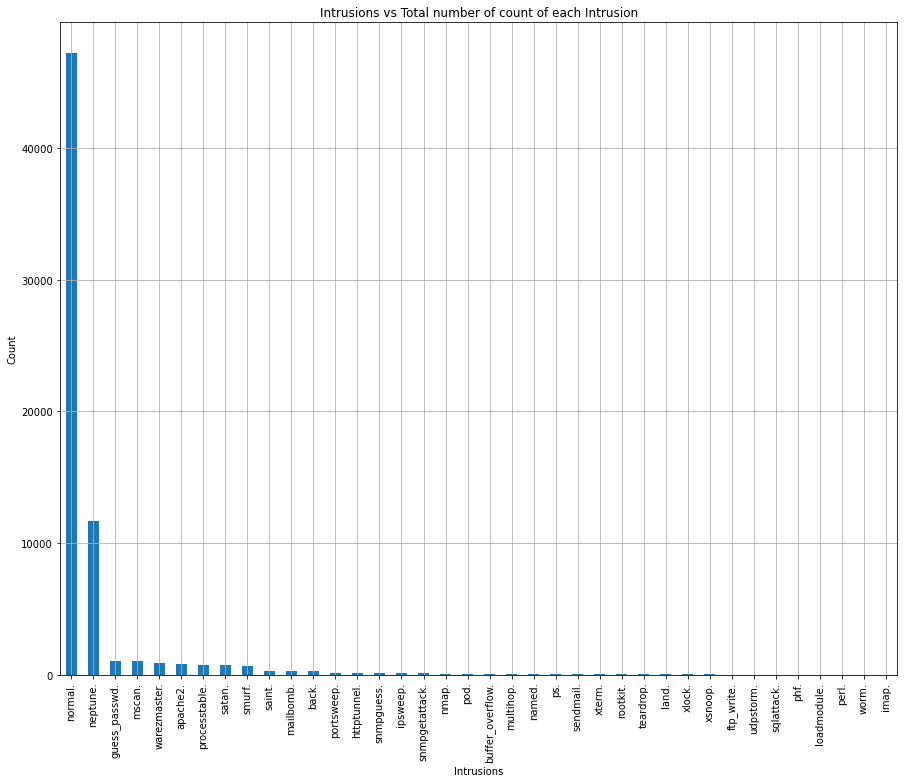

In [29]:
plt.figure(figsize=(15,12))
val = df_test['class_label'].value_counts()
val.plot(kind='bar')
plt.ylabel('Count')
plt.xlabel('Intrusions')
plt.title('Intrusions vs Total number of count of each Intrusion')
plt.grid()
plt.show()

In [30]:
cls_te=df_test['class_label'].value_counts().index.tolist()
val_te=df_test['class_label'].value_counts()

print(" Total types of Intrusion" , len(val_te))
print("**" *50)

print(" Name of the Intrusion and the total number of count of it ")
print("**" *50)

x = np.argsort(-val_te.values)
for i in x:
    print( cls_te[i], ':',val_te.values[i],'(', np.round((val_te.values[i]/len(df_test)*100), 3), '%)')

 Total types of Intrusion 38
****************************************************************************************************
 Name of the Intrusion and the total number of count of it 
****************************************************************************************************
normal. : 47225 ( 71.083 %)
neptune. : 11643 ( 17.525 %)
guess_passwd. : 1060 ( 1.596 %)
mscan. : 1045 ( 1.573 %)
warezmaster. : 882 ( 1.328 %)
apache2. : 794 ( 1.195 %)
processtable. : 729 ( 1.097 %)
satan. : 714 ( 1.075 %)
smurf. : 664 ( 0.999 %)
saint. : 274 ( 0.412 %)
mailbomb. : 263 ( 0.396 %)
back. : 253 ( 0.381 %)
portsweep. : 142 ( 0.214 %)
httptunnel. : 135 ( 0.203 %)
snmpguess. : 126 ( 0.19 %)
ipsweep. : 113 ( 0.17 %)
snmpgetattack. : 111 ( 0.167 %)
nmap. : 76 ( 0.114 %)
pod. : 24 ( 0.036 %)
buffer_overflow. : 22 ( 0.033 %)
multihop. : 18 ( 0.027 %)
named. : 17 ( 0.026 %)
ps. : 16 ( 0.024 %)
sendmail. : 14 ( 0.021 %)
xterm. : 13 ( 0.02 %)
rootkit. : 13 ( 0.02 %)
teardrop. : 12 ( 0.018 %)
xl

#### Observation 

* In the above code, there are 37 type of intrusions and 1 Normal or Non-intrusion type signal.

* Normal or Non-intrusion type signal has 71% datapoints.

* 21 type of intrusions have datapoint less than 0.5% and only neptune. type has highest dominates i.e. 17%.

* So its a completely an imbalanced dataset like train dataset.

* Test dataset has more types of unseen intrusion than train dataset, still we will compare the intrusion type or the class label of both the dataset.

In [31]:
# Check the unique intrusion or class label in both the train and test dataset

#Store the unique values of the column
tr_cl = set(df_train['class_label'].unique())
te_cl = set(df_test['class_label'].unique())

#comparison of two variable
extra = te_cl - tr_cl

print("number of extra intrusion present in test dataset only : \n ", extra)

print("**" *50)

print("number of extra intrusion present in test dataset only : ",len(extra))

number of extra intrusion present in test dataset only : 
  {'xsnoop.', 'named.', 'saint.', 'ps.', 'xterm.', 'sqlattack.', 'udpstorm.', 'xlock.', 'sendmail.', 'snmpgetattack.', 'snmpguess.', 'httptunnel.', 'mscan.', 'mailbomb.', 'processtable.', 'worm.', 'apache2.'}
****************************************************************************************************
number of extra intrusion present in test dataset only :  17


In [32]:
common_intrusion = te_cl - extra

print("number of intrusion which are common in both train and test dataset : \n",common_intrusion)

print("**" *50)

print("number of intrusion which are common in both train and test dataset : ", len(common_intrusion))

number of intrusion which are common in both train and test dataset : 
 {'ipsweep.', 'teardrop.', 'back.', 'guess_passwd.', 'pod.', 'perl.', 'buffer_overflow.', 'rootkit.', 'normal.', 'land.', 'multihop.', 'loadmodule.', 'satan.', 'phf.', 'portsweep.', 'imap.', 'neptune.', 'warezmaster.', 'ftp_write.', 'smurf.', 'nmap.'}
****************************************************************************************************
number of intrusion which are common in both train and test dataset :  21


In [33]:
only_tr = tr_cl - common_intrusion

print("number of intrusion present in train dataset only : \n ", only_tr)

print("**" *50)

print("number of intrusion present in train dataset only : ",len(only_tr))

number of intrusion present in train dataset only : 
  {'warezclient.', 'spy.'}
****************************************************************************************************
number of intrusion present in train dataset only :  2


#### Observation

* 21 types of intrusion present in both the train and test dataset  

* 17 types of intrusion present only in the test data  

* 2 types of intrusion present only in the train data 

* Total 19 unseen class labels and corrosponding data to build the model. We will find out how it works at the end of this project.

### I divided this problem into two part.

### i) Binary Classification Problem

### ii) Multiclass Classification Problem

## i) Binary Classification Problem

In [2]:
""" Reload the cleaned datasets """

df_train=pd.read_csv("cleaned_train.csv")

df_test=pd.read_csv("cleaned_test.csv")

In [3]:
""" In the below code we have basically divided the intrusions based signal as 1 and non intrusion based signal as 0 
and storing the values into a newly created column class_label_bi for both the train and the test dataframe """

df_train['class_label_bi'] = df_train.class_label.apply(lambda x: 0 if x == 'normal.' else 1)
df_test['class_label_bi'] = df_test.class_label.apply(lambda x: 0 if x == 'normal.' else 1)

<h3> Comparison of Intrusion vs Non Intrusion plot </h3>

#### Train dataset

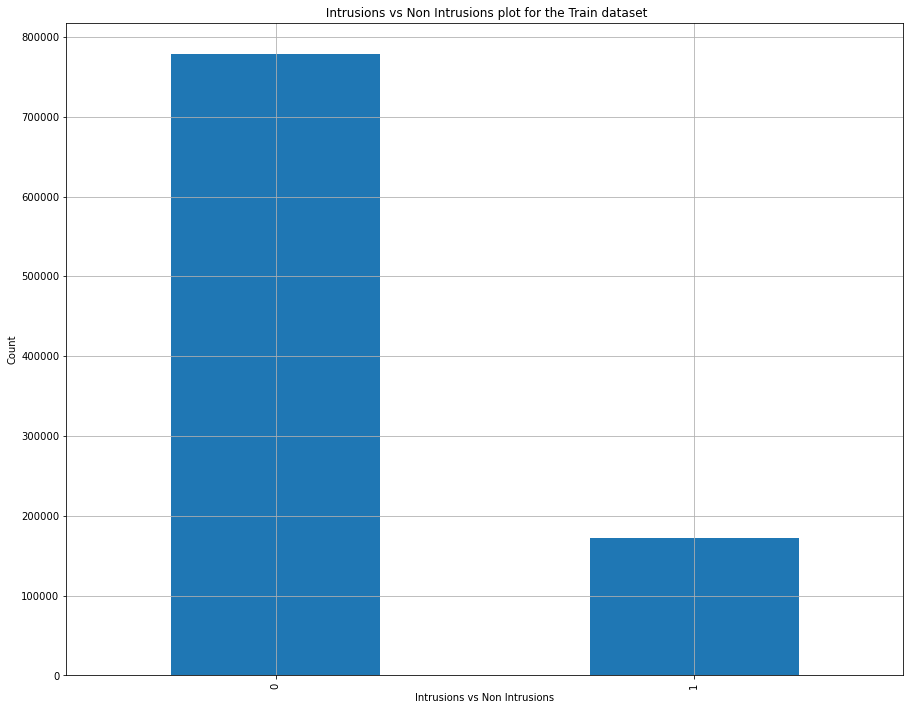

In [4]:
plt.figure(figsize=(15,12))
val = df_train['class_label_bi'].value_counts()
val.plot(kind='bar')
plt.ylabel('Count')
plt.xlabel('Intrusions vs Non Intrusions')
plt.title(' Intrusions vs Non Intrusions plot for the Train dataset')
plt.grid()
plt.show()

In [5]:
#calculating the proportion of class labels in the class_label_bi column for the train dataset

#To select rows whose column value equals to below mentioned number
non_intrusion_count=len(df_train[df_train['class_label_bi']==0])
intrusion_count=len(df_train[df_train['class_label_bi']==1])

print("Percentage of non intrusion signal count: ",np.round((non_intrusion_count/(non_intrusion_count+intrusion_count)*100), 3) ,'%')

print("Percentage of intrusion signal count: ",np.round((intrusion_count/(non_intrusion_count+intrusion_count)*100), 3) ,'%')

Percentage of non intrusion signal count:  81.898 %
Percentage of intrusion signal count:  18.102 %


#### Test dataset

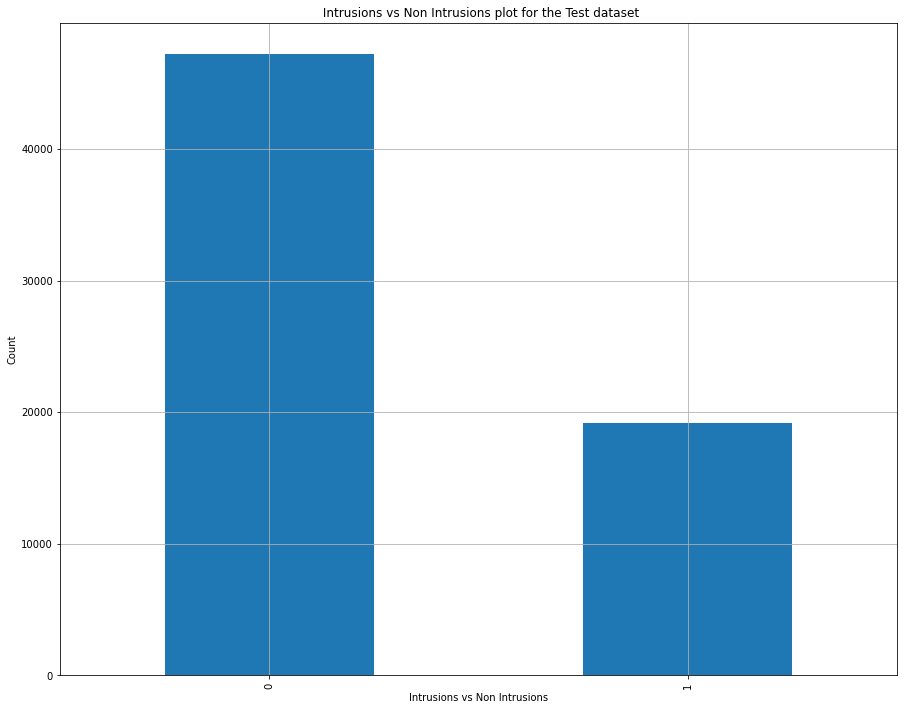

In [6]:
plt.figure(figsize=(15,12))
val = df_test['class_label_bi'].value_counts()
val.plot(kind='bar')
plt.ylabel('Count')
plt.xlabel('Intrusions vs Non Intrusions')
plt.title(' Intrusions vs Non Intrusions plot for the Test dataset')
plt.grid()
plt.show()

In [7]:
#calculating the proportion of class labels in the class_label_bi column for the test dataset

non_intrusion_count=len(df_test[df_test['class_label_bi']==0])
intrusion_count=len(df_test[df_test['class_label_bi']==1])

print("Percentage of non intrusion signal count: ",np.round((non_intrusion_count/(non_intrusion_count+intrusion_count)*100), 3) ,'%')

print("Percentage of intrusion signal count: ",np.round((intrusion_count/(non_intrusion_count+intrusion_count)*100), 3) ,'%')

Percentage of non intrusion signal count:  71.083 %
Percentage of intrusion signal count:  28.917 %


#### Observation


* Can clearly see both datasets are highly imbalanced based on class label for binary classification.

* Train dataset is more imbalanced than test dataset


*******************************************************

## Data Analysis on catagorical and continous features for both the train and test dataset

### Catagorical or discrete Features

####  protocol_type

#### Train dataset

Count of each n every protocol types --- 
 tcp     867740
udp      73858
icmp      8872
Name: protocol_type, dtype: int64
--------------------------------------------------------------------------------------------------


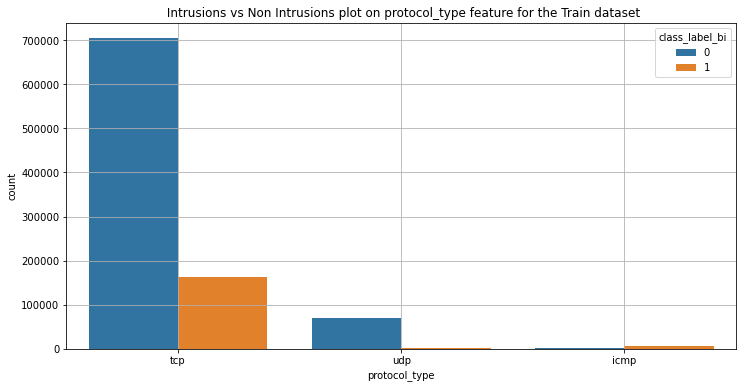

In [9]:
#Count the individual values inside the column
protocol_type = df_train['protocol_type'].value_counts()
print("Count of each n every protocol types --- \n" ,protocol_type )
print("--------------------------------------------------------------------------------------------------")


plt.subplots(figsize=(12,6))
#Plot histogram of count of individual values
sns.countplot(x = 'protocol_type' , data = df_train , hue = 'class_label_bi')
plt.title(" Intrusions vs Non Intrusions plot on protocol_type feature for the Train dataset")
plt.grid()
plt.show()

#### Observation

* We have 3 different types of protocols in the training dataset (TCP, UDP , ICMP)

* lots of points belong to TCP whereas UDP and ICMP has fewer points

* For UDP and TCP protocols, the dataset has more numbers of the Non Intrusion signals than the Intrusion signal.

* For ICMP protocol, the dataset has slightly more numbers of the Intrusion signals than the Non-Intrusion signal.

#### Test Dataset

Count of each n every protocol types 
 tcp     61428
udp      3918
icmp     1090
Name: protocol_type, dtype: int64
--------------------------------------------------------------------------------------------------


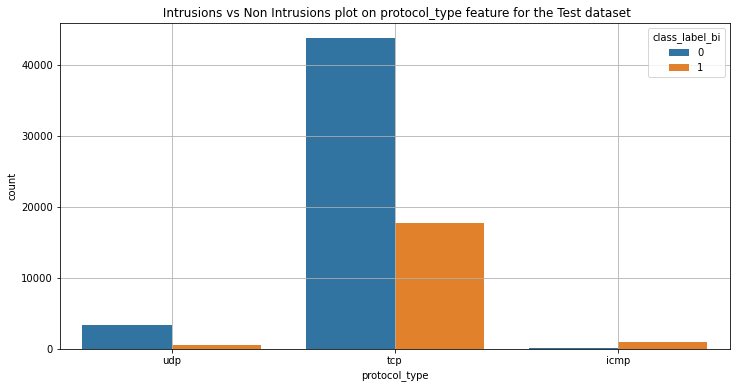

In [10]:
protocol_type = df_test['protocol_type'].value_counts()
print("Count of each n every protocol types \n" ,protocol_type )
print("--------------------------------------------------------------------------------------------------")


plt.subplots(figsize=(12,6))
sns.countplot(x = 'protocol_type' , data = df_test , hue = 'class_label_bi')
plt.title(" Intrusions vs Non Intrusions plot on protocol_type feature for the Test dataset")
plt.grid()
plt.show()

#### Observation

* We have 3 different types of protocol in the test dataset (TCP, UDP, ICMP)

* lots of points belong to TCP whereas UDP and ICMP has fewer points

* For UDP and TCP protocols, the dataset has more numbers of the Non Intrusion signals than the Intrusion signal.

* For ICMP protocol, the dataset has slightly more numbers of the Intrusion signals than the Non-Intrusion signal.

### service

#### Train Data

Count of each n every service  
 http         558255
private      111398
smtp          96496
domain_u      43255
ftp_data      40240
              ...  
tftp_u            3
aol               2
http_8001         2
harvest           2
http_2784         1
Name: service, Length: 70, dtype: int64
--------------------------------------------------------------------------------------------------


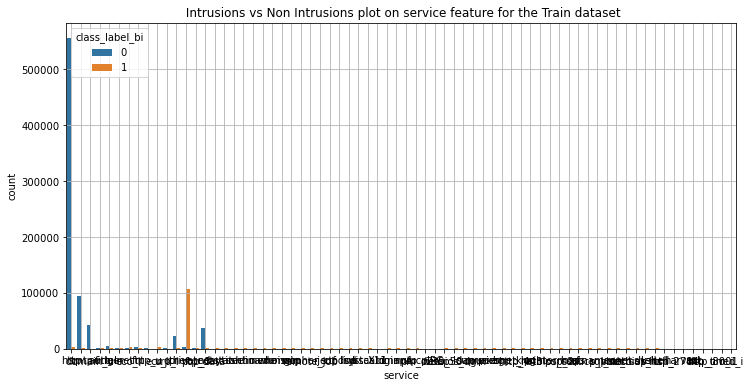

In [11]:
service = df_train['service'].value_counts()
print("Count of each n every service  \n" ,service )
print("--------------------------------------------------------------------------------------------------")


plt.subplots(figsize=(12,6))
sns.countplot(x = 'service' , data = df_train , hue = 'class_label_bi')
plt.title(" Intrusions vs Non Intrusions plot on service feature for the Train dataset")
plt.grid()
plt.show()

#### Observation

* There are two services HTTP and private have more data points than other services.

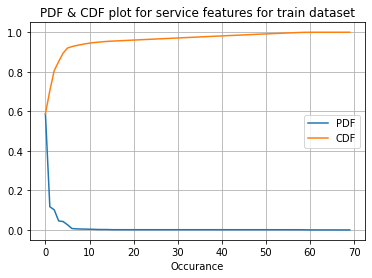

In [13]:
#Calculate PDF of the service column
pdf = service.values/sum(service.values)
#the cumulative sum of the pdf
cdf = np.cumsum(pdf)
plt.plot(pdf)
plt.plot(cdf)

#legend describe the parameter with colour code, So that we can indentify the graph with colour
plt.legend(['PDF', 'CDF'])
plt.title('PDF & CDF plot for service features for train dataset')
plt.xlabel("Occurance")
plt.grid()
plt.show()


#### Observation

* Top 6 services occurrences to 90% of train data, which means these services occur very frequently than other services.


#### Test Data

Count of each n every service  
 http        40052
private     10027
smtp         3528
domain_u     2402
telnet       1699
            ...  
pm_dump        16
X11            15
tim_i           5
icmp            2
tftp_u          1
Name: service, Length: 65, dtype: int64
--------------------------------------------------------------------------------------------------


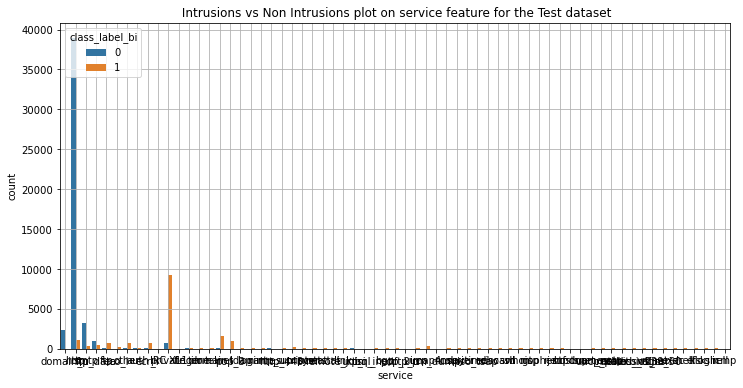

In [14]:
service_te = df_test['service'].value_counts()
print("Count of each n every service  \n" ,service_te )
print("--------------------------------------------------------------------------------------------------")


plt.subplots(figsize=(12,6))
sns.countplot(x = 'service' , data = df_test , hue = 'class_label_bi')
plt.title(" Intrusions vs Non Intrusions plot on service feature for the Test dataset")
plt.grid()
plt.show()

#### Observation

* There are two services HTTP and private have more data points than other services.

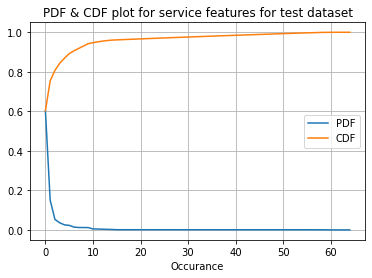

In [15]:
pdf = service_te.values/sum(service_te.values)
cdf = np.cumsum(pdf)
plt.plot(pdf)
plt.plot(cdf)
plt.legend(['PDF', 'CDF'])
plt.title('PDF & CDF plot for service features for test dataset')
plt.xlabel("Occurance")
plt.grid()
plt.show()


#### Observation

* Top 8 services occurrences to 90% of train data, which means these services occur very frequently than other services.


### Flag

#### Train Data

Count of each n every flag types 
 SF        755847
S0        132841
REJ        53099
RSTO        4878
RSTR        2601
S1           532
SH           297
S2           159
RSTOS0       122
S3            50
OTH           44
Name: flag, dtype: int64
--------------------------------------------------------------------------------------------------


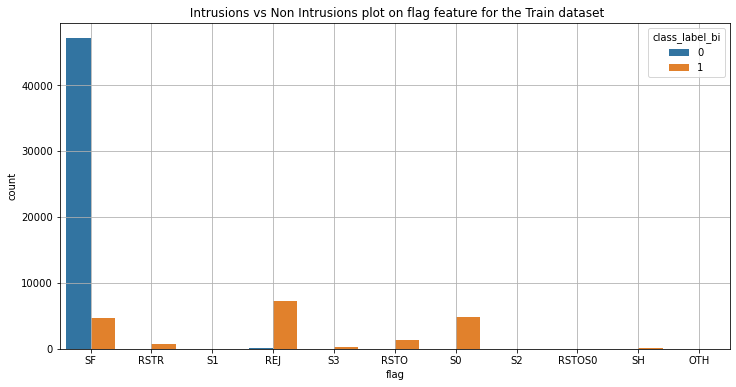

In [16]:
flag = df_train['flag'].value_counts()
print("Count of each n every flag types \n" ,flag )
print("--------------------------------------------------------------------------------------------------")


plt.subplots(figsize=(12,6))
sns.countplot(x = 'flag' , data = df_test , hue = 'class_label_bi')
plt.title(" Intrusions vs Non Intrusions plot on flag feature for the Train dataset")
plt.grid()
plt.show()

#### Observation


* Intrusion response of SF, REJ, S0, RSTO flags occurred more compared to other flags in Train Dataset.

#### Test Data

Count of each n every flag types 
 SF        51755
REJ        7338
S0         4892
RSTO       1367
RSTR        694
S3          259
SH           76
S1           27
S2           22
OTH           4
RSTOS0        2
Name: flag, dtype: int64
--------------------------------------------------------------------------------------------------


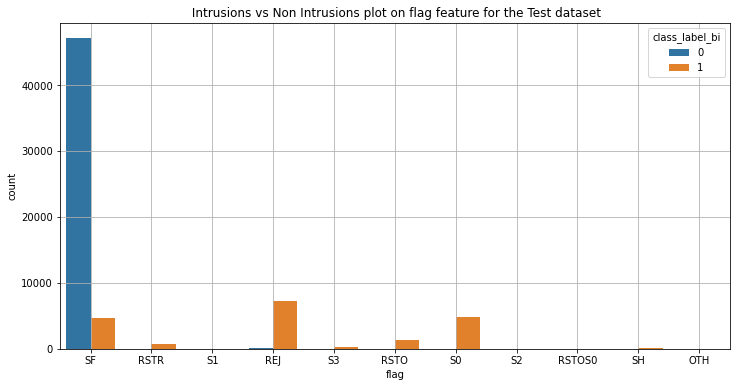

In [17]:
flag = df_test['flag'].value_counts()
print("Count of each n every flag types \n" ,flag )
print("--------------------------------------------------------------------------------------------------")


plt.subplots(figsize=(12,6))
sns.countplot(x = 'flag' , data = df_test , hue = 'class_label_bi')
plt.title(" Intrusions vs Non Intrusions plot on flag feature for the Test dataset")
plt.grid()
plt.show()

#### Observation


* Intrusion response of SF, RSTR, REJ, S0, RSTO flags occurred more compared to other flags in Test Dataset.

*******************************************

## Continuous features

### Duration ( length (number of seconds) of the connection )

#### Train Data

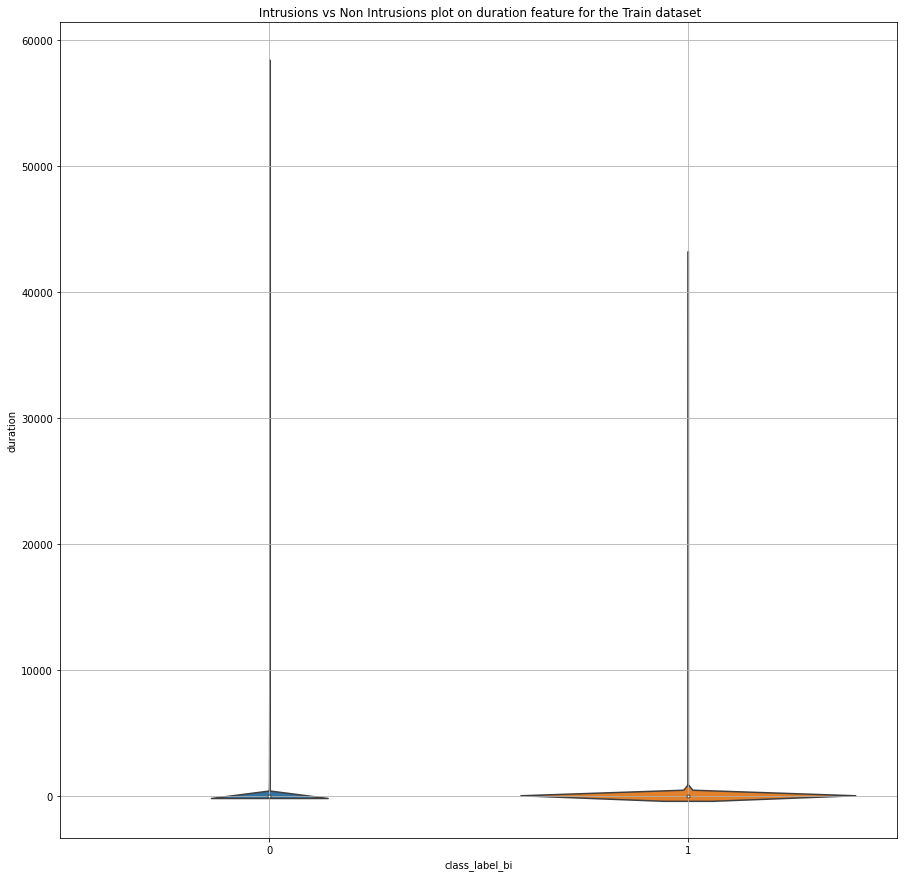

In [21]:
plt.figure(figsize=(15,15))
sns.violinplot(x ='class_label_bi' , y = 'duration' , data = df_train )
plt.title(" Intrusions vs Non Intrusions plot on duration feature for the Train dataset")
plt.grid()
plt.show()

#### Observation

* Most of the point lies around 0.

* For Class label 1 or intrusion signal, a few points cross above 4k.

* For Class label 0 or Non-intrusion signal, a few points cross above 5k.


In [22]:
for i in range(0,100,10):
    # take all the value of duration column
    var = df_train['duration'].values
    # falttend them and sort in ascending order
    var = np.sort(var , axis= None)
    # formula to calculate percentile "int(len(var)*float(i)/100"
    print("{} percentile value {}".format(i,var[int(len(var)*float(i)/100)]))
print("100 percentile value is ",var[-1])

0 percentile value 0
10 percentile value 0
20 percentile value 0
30 percentile value 0
40 percentile value 0
50 percentile value 0
60 percentile value 0
70 percentile value 0
80 percentile value 0
90 percentile value 0
100 percentile value is  58329


#### Observation

* We can see there are lots of values in the 100 percentile, the rest of the percentiles are 0.

In [23]:
#calculating speed values at each percntile 90,91,92,93,94,95,96,97,98,99,100
for i in range(90,100):
    var = df_train['duration'].values
    var = np.sort(var,axis = None)
    print("{} percentile value is {}".format(i,var[int(len(var)*(float(i)/100))]))
print("100 percentile value is ",var[-1])

90 percentile value is 0
91 percentile value is 0
92 percentile value is 1
93 percentile value is 1
94 percentile value is 2
95 percentile value is 3
96 percentile value is 8
97 percentile value is 25
98 percentile value is 780
99 percentile value is 4296
100 percentile value is  58329


#### Observation

* We can see there are lots of values in the 100 percentile, the rest of the percentiles are not so high.

In [24]:
#calculating speed values at each percntile 99.0,99.1,99.2,99.3,99.4,99.5,99.6,99.7,99.8,99.9,100
for i in np.arange(0.0, 1.0, 0.1):
    var = df_train['duration'].values
    var = np.sort(var,axis = None)
    print("{} percentile value is {}".format(99+i,var[int(len(var)*(float(99+i)/100))]))
print("100 percentile value is ",var[-1])



99.0 percentile value is 4296
99.1 percentile value is 4899
99.2 percentile value is 5551
99.3 percentile value is 6404
99.4 percentile value is 7315
99.5 percentile value is 8524
99.6 percentile value is 9826
99.7 percentile value is 11610
99.8 percentile value is 14164
99.9 percentile value is 19759
100 percentile value is  58329


#### Observation

* From 99.0 to 100 percentile the value is increased drastically. So, we can consider these values as an outlier

#### Test Data

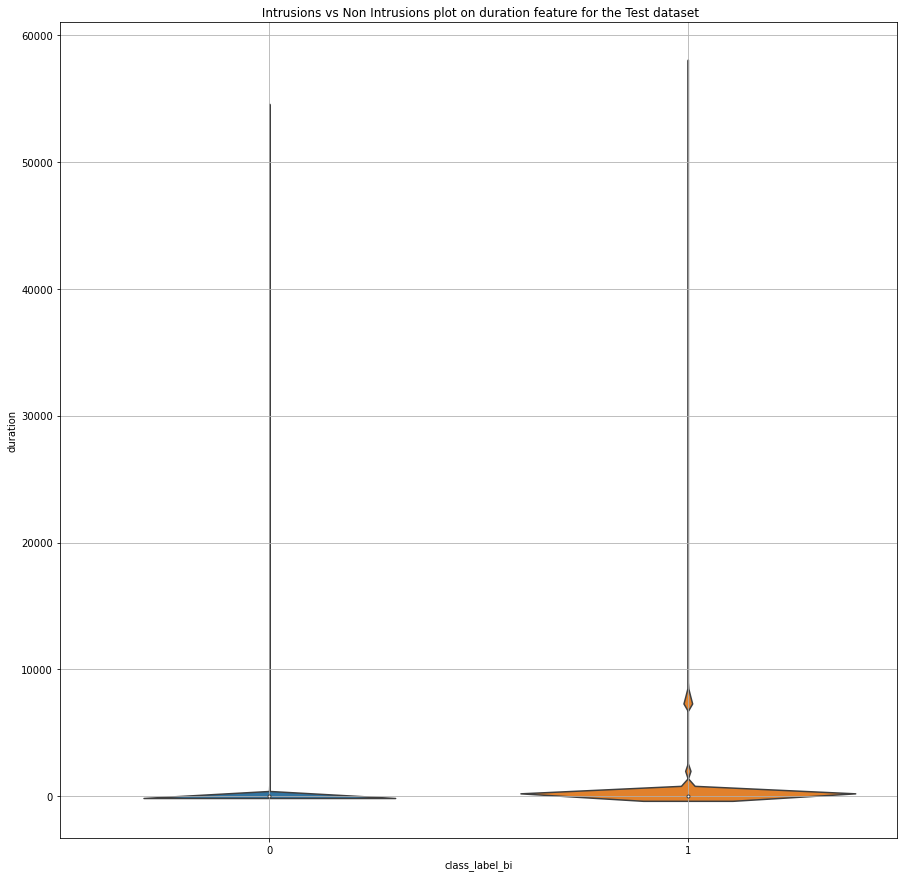

In [25]:
plt.figure(figsize=(15,15))
sns.violinplot(x ='class_label_bi' , y = 'duration' , data = df_test )
plt.title(" Intrusions vs Non Intrusions plot on duration feature for the Test dataset")
plt.grid()
plt.show()

#### Observation

* Most of the point lies around 0.

* For Class label 1 or intrusion signal, a few points cross around 6k.

* For Class label 0 or Non-intrusion signal, a few points cross above 5k.


In [26]:
for i in range(0,100,10):
    # take all the value of duration column
    var = df_test['duration'].values
    # falttend them and sort in ascending order
    var = np.sort(var , axis= None)
    # formula to calculate percentile "int(len(var)*float(i)/100"
    print("{} percentile value {}".format(i,var[int(len(var)*float(i)/100)]))
print("100 percentile value is ",var[-1])


0 percentile value 0
10 percentile value 0
20 percentile value 0
30 percentile value 0
40 percentile value 0
50 percentile value 0
60 percentile value 0
70 percentile value 0
80 percentile value 0
90 percentile value 0
100 percentile value is  57715


#### Observation

* We can see there are lots of values in the 100 percentile, the rest of the percentiles are 0.

In [27]:
#calculating speed values at each percntile 90,91,92,93,94,95,96,97,98,99,100
for i in range(90,100):
    var = df_test['duration'].values
    var = np.sort(var,axis = None)
    print("{} percentile value is {}".format(i,var[int(len(var)*(float(i)/100))]))
print("100 percentile value is ",var[-1])

90 percentile value is 0
91 percentile value is 0
92 percentile value is 0
93 percentile value is 1
94 percentile value is 1
95 percentile value is 3
96 percentile value is 5
97 percentile value is 67
98 percentile value is 282
99 percentile value is 2064
100 percentile value is  57715


#### Observation

* We can see there are lots of values in the 100 percentile, the rest of the percentiles are not so high.

In [28]:
#calculating speed values at each percntile 99.0,99.1,99.2,99.3,99.4,99.5,99.6,99.7,99.8,99.9,100
for i in np.arange(0.0, 1.0, 0.1):
    var = df_test['duration'].values
    var = np.sort(var,axis = None)
    print("{} percentile value is {}".format(99+i,var[int(len(var)*(float(99+i)/100))]))
print("100 percentile value is ",var[-1])

99.0 percentile value is 2064
99.1 percentile value is 2075
99.2 percentile value is 6153
99.3 percentile value is 7300
99.4 percentile value is 7390
99.5 percentile value is 7478
99.6 percentile value is 7570
99.7 percentile value is 7699
99.8 percentile value is 8088
99.9 percentile value is 8176
100 percentile value is  57715


#### Observation

* From 99.0 to 100 percentile the value is increased drastically. So, we can consider these values as an outlier

### src_bytes (Source to Destination)

#### Train Dataset

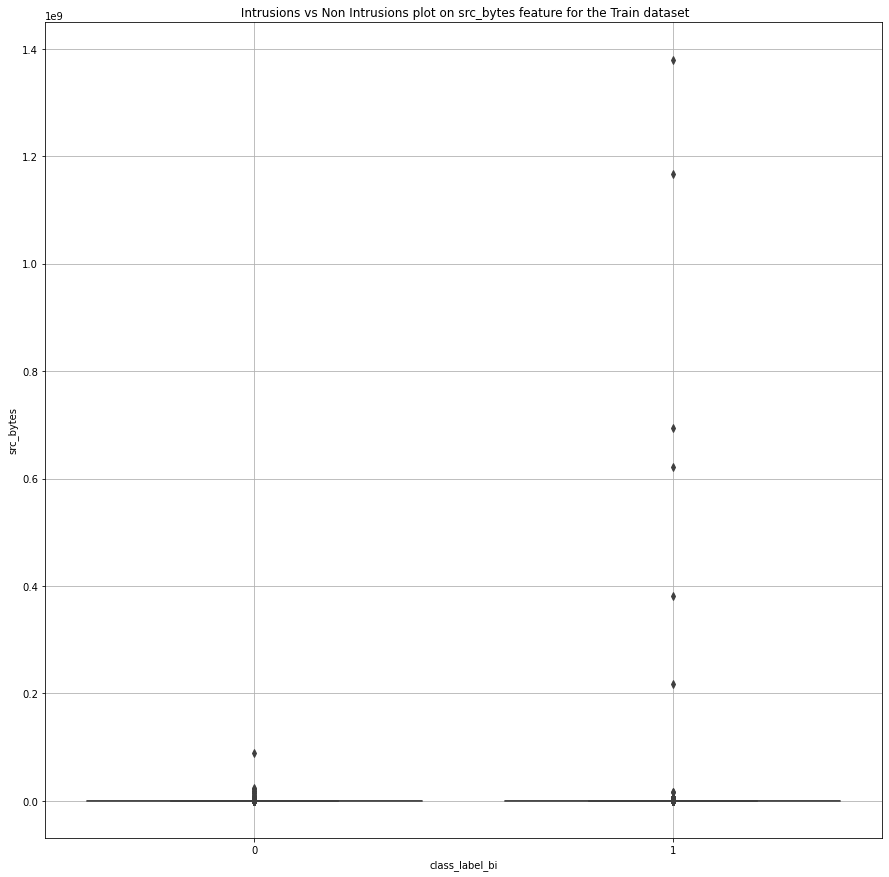

In [29]:
plt.figure(figsize=(15,15))
sns.boxplot(x ='class_label_bi' , y = 'src_bytes' , data = df_train )
plt.title(" Intrusions vs Non Intrusions plot on src_bytes feature for the Train dataset")
plt.grid()
plt.show()

#### Observation

* For both labels 0 and 1, it is hard to analyse.

* But for class label 1 data transfer spike is high

In [30]:
for i in range(0,100,10):
    # take all the value of duration column
    var = df_train['src_bytes'].values
    # falttend them and sort in ascending order
    var = np.sort(var , axis= None)
    # formula to calculate percentile "int(len(var)*float(i)/100"
    print("{} percentile value {}".format(i,var[int(len(var)*float(i)/100)]))
print("100 percentile value is ",var[-1])

print( "---------------------------------------------------------------------------")

#calculating speed values at each percntile 90,91,92,93,94,95,96,97,98,99,100
for i in range(90,100):
    var = df_train['src_bytes'].values
    var = np.sort(var,axis = None)
    print("{} percentile value is {}".format(i,var[int(len(var)*(float(i)/100))]))
print("100 percentile value is ",var[-1])

print( "---------------------------------------------------------------------------")

#calculating speed values at each percntile 99.0,99.1,99.2,99.3,99.4,99.5,99.6,99.7,99.8,99.9,100
for i in np.arange(0.0, 1.0, 0.1):
    var = df_train['src_bytes'].values
    var = np.sort(var,axis = None)
    print("{} percentile value is {}".format(99+i,var[int(len(var)*(float(99+i)/100))]))
print("100 percentile value is ",var[-1])


0 percentile value 0
10 percentile value 0
20 percentile value 0
30 percentile value 147
40 percentile value 209
50 percentile value 228
60 percentile value 257
70 percentile value 300
80 percentile value 328
90 percentile value 915
100 percentile value is  1379963888
---------------------------------------------------------------------------
90 percentile value is 915
91 percentile value is 1017
92 percentile value is 1120
93 percentile value is 1241
94 percentile value is 1385
95 percentile value is 1560
96 percentile value is 1830
97 percentile value is 2308
98 percentile value is 3888
99 percentile value is 10073
100 percentile value is  1379963888
---------------------------------------------------------------------------
99.0 percentile value is 10073
99.1 percentile value is 11165
99.2 percentile value is 11803
99.3 percentile value is 12286
99.4 percentile value is 12983
99.5 percentile value is 14052
99.6 percentile value is 15876
99.7 percentile value is 26408
99.8 percentile

#### Observation

* Value is starting to fluctuate from the 30th percentile.

* At the 100th percentile, there is a huge data that has transferred from source to destination.

#### Test Data

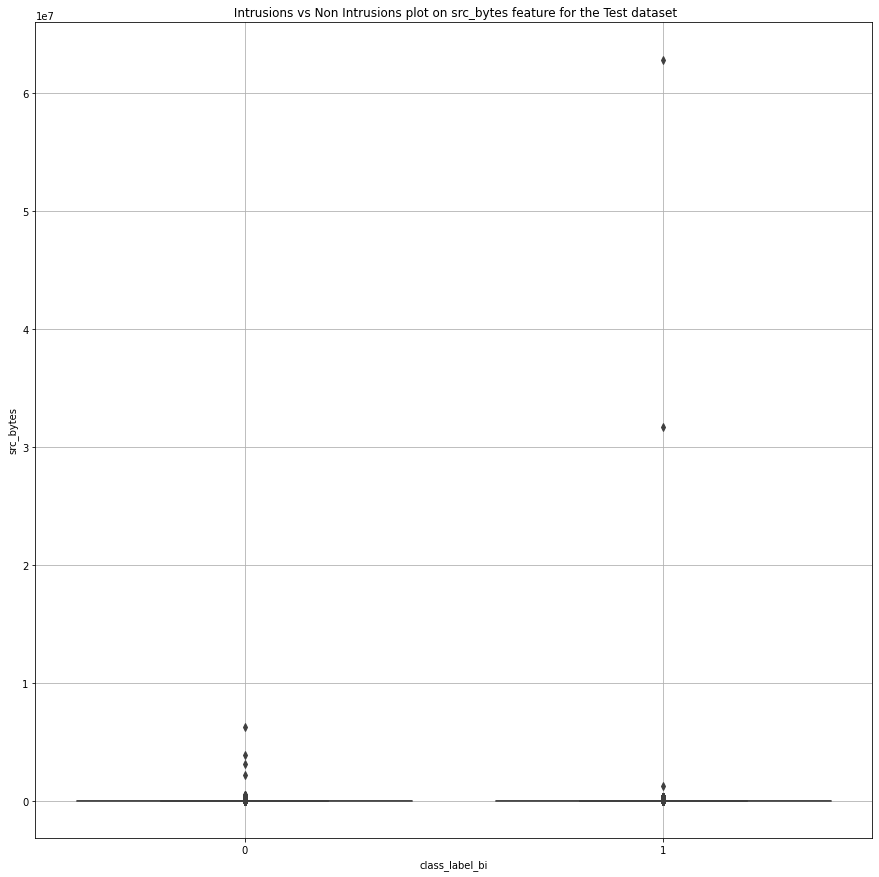

In [31]:
plt.figure(figsize=(15,15))
sns.boxplot(x ='class_label_bi' , y = 'src_bytes' , data = df_test )
plt.title(" Intrusions vs Non Intrusions plot on src_bytes feature for the Test dataset")
plt.grid()
plt.show()

#### Observation

* For both labels 0 and 1, it is hard to analyse.

* But for class label 1 few data transfer spike is high

In [32]:
for i in range(0,100,10):
    # take all the value of duration column
    var = df_test['src_bytes'].values
    # falttend them and sort in ascending order
    var = np.sort(var , axis= None)
    # formula to calculate percentile "int(len(var)*float(i)/100"
    print("{} percentile value {}".format(i,var[int(len(var)*float(i)/100)]))
print("100 percentile value is ",var[-1])


print( "---------------------------------------------------------------------------")

#calculating speed values at each percntile 90,91,92,93,94,95,96,97,98,99,100
for i in range(90,100):
    var = df_test['src_bytes'].values
    var = np.sort(var,axis = None)
    print("{} percentile value is {}".format(i,var[int(len(var)*(float(i)/100))]))
print("100 percentile value is ",var[-1])

print( "---------------------------------------------------------------------------")

#calculating speed values at each percntile 99.0,99.1,99.2,99.3,99.4,99.5,99.6,99.7,99.8,99.9,100
for i in np.arange(0.0, 1.0, 0.1):
    var = df_test['src_bytes'].values
    var = np.sort(var,axis = None)
    print("{} percentile value is {}".format(99+i,var[int(len(var)*(float(99+i)/100))]))
print("100 percentile value is ",var[-1])



0 percentile value 0
10 percentile value 0
20 percentile value 0
30 percentile value 54
40 percentile value 205
50 percentile value 224
60 percentile value 246
70 percentile value 292
80 percentile value 315
90 percentile value 359
100 percentile value is  62825648
---------------------------------------------------------------------------
90 percentile value is 359
91 percentile value is 385
92 percentile value is 641
93 percentile value is 878
94 percentile value is 1032
95 percentile value is 1274
96 percentile value is 1739
97 percentile value is 2599
98 percentile value is 8695
99 percentile value is 56504
100 percentile value is  62825648
---------------------------------------------------------------------------
99.0 percentile value is 56504
99.1 percentile value is 57184
99.2 percentile value is 59424
99.3 percentile value is 62344
99.4 percentile value is 72564
99.5 percentile value is 72564
99.6 percentile value is 78202
99.7 percentile value is 283618
99.8 percentile value 

#### Observation

* Value is starting to fluctuate from the 30th percentile.

* At the 100th percentile, there is a huge data that has transferred from source to destination.

### dst_bytes (Destination to Source)

#### Train Dataset

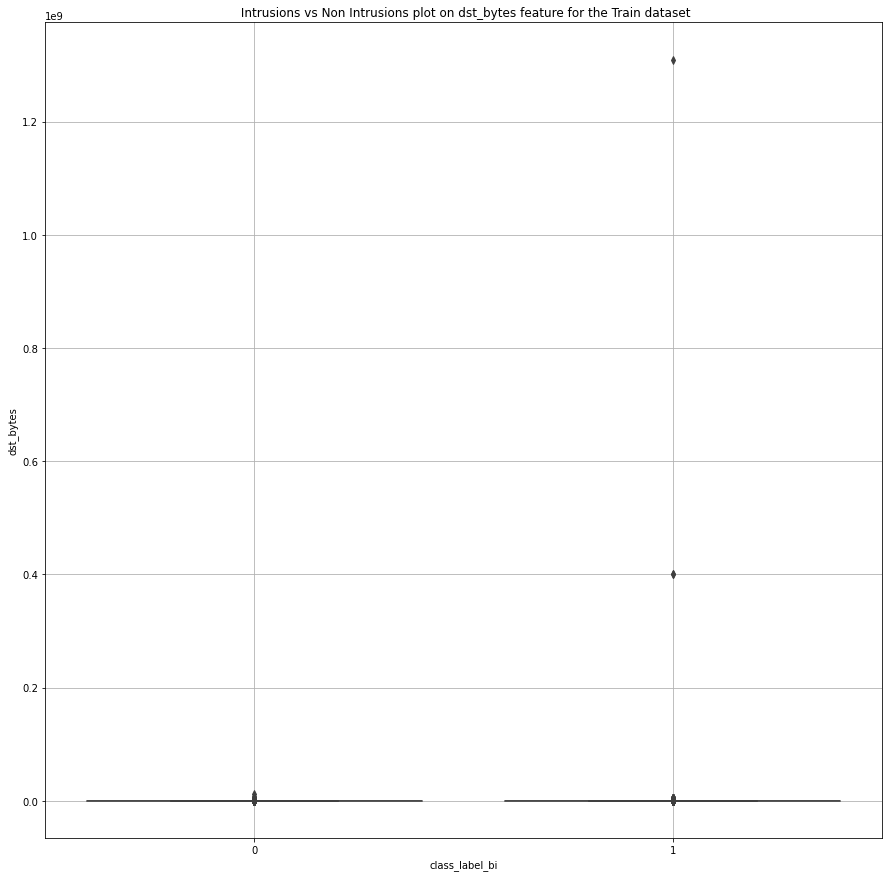

In [33]:
plt.figure(figsize=(15,15))
sns.boxplot(x ='class_label_bi' , y = 'dst_bytes' , data = df_train )
plt.title(" Intrusions vs Non Intrusions plot on dst_bytes feature for the Train dataset")
plt.grid()
plt.show()

#### Observation

* Dataset looks fine, expect very few outliers in class label 1


In [34]:
for i in range(0,100,10):
    # take all the value of duration column
    var = df_train['dst_bytes'].values
    # falttend them and sort in ascending order
    var = np.sort(var , axis= None)
    # formula to calculate percentile "int(len(var)*float(i)/100"
    print("{} percentile value {}".format(i,var[int(len(var)*float(i)/100)]))
print("100 percentile value is ",var[-1])

print( "---------------------------------------------------------------------------")

#calculating speed values at each percntile 90,91,92,93,94,95,96,97,98,99,100
for i in range(90,100):
    var = df_train['dst_bytes'].values
    var = np.sort(var,axis = None)
    print("{} percentile value is {}".format(i,var[int(len(var)*(float(i)/100))]))
print("100 percentile value is ",var[-1])

print( "---------------------------------------------------------------------------")

#calculating speed values at each percntile 99.0,99.1,99.2,99.3,99.4,99.5,99.6,99.7,99.8,99.9,100
for i in np.arange(0.0, 1.0, 0.1):
    var = df_train['dst_bytes'].values
    var = np.sort(var,axis = None)
    print("{} percentile value is {}".format(99+i,var[int(len(var)*(float(99+i)/100))]))
print("100 percentile value is ",var[-1])


0 percentile value 0
10 percentile value 0
20 percentile value 0
30 percentile value 105
40 percentile value 325
50 percentile value 378
60 percentile value 784
70 percentile value 1509
80 percentile value 2698
90 percentile value 6807
100 percentile value is  1309937401
---------------------------------------------------------------------------
90 percentile value is 6807
91 percentile value is 7512
92 percentile value is 8379
93 percentile value is 9378
94 percentile value is 10446
95 percentile value is 11953
96 percentile value is 13647
97 percentile value is 16564
98 percentile value is 21951
99 percentile value is 31614
100 percentile value is  1309937401
---------------------------------------------------------------------------
99.0 percentile value is 31614
99.1 percentile value is 33054
99.2 percentile value is 34720
99.3 percentile value is 37014
99.4 percentile value is 39474
99.5 percentile value is 43129
99.6 percentile value is 48165
99.7 percentile value is 56258
99.8 p

#### Observation

* At 100th percentile, there is a huge data has transferred from destination to source.

#### Test Dataset


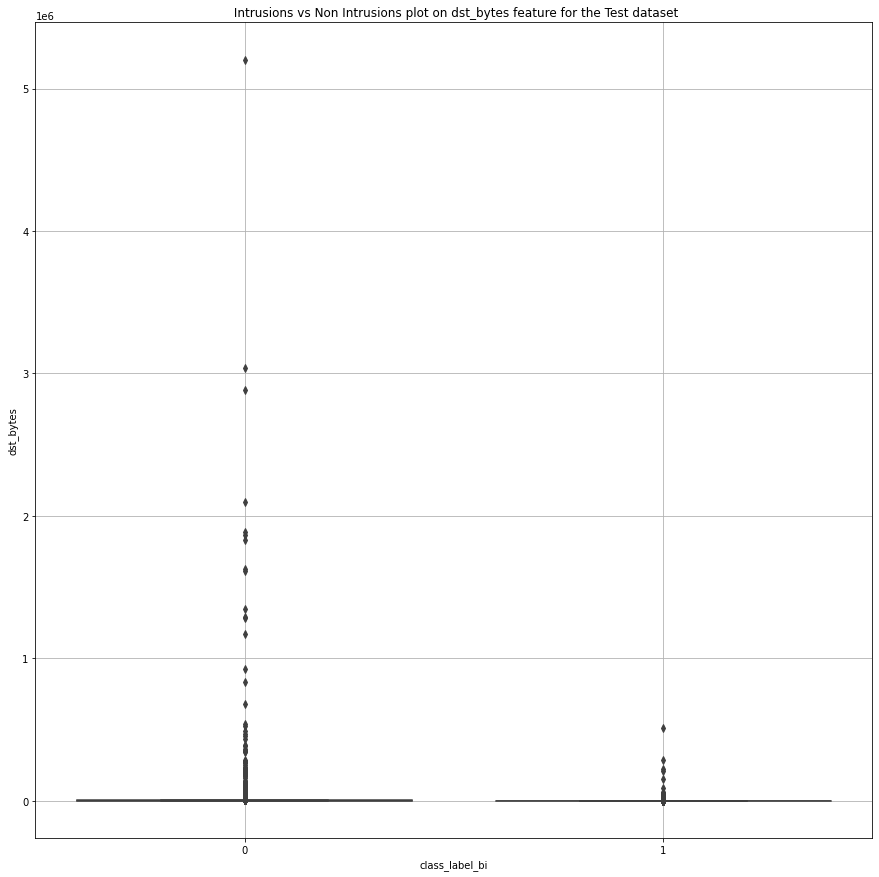

In [35]:
plt.figure(figsize=(15,15))
sns.boxplot(x ='class_label_bi' , y = 'dst_bytes' , data = df_test )
plt.title(" Intrusions vs Non Intrusions plot on dst_bytes feature for the Test dataset")
plt.grid()
plt.show()

#### Observation

* For the test dataset there are so many huge spikes in non-instrusion signal or class label 0.

In [36]:
for i in range(0,100,10):
    # take all the value of duration column
    var = df_test['dst_bytes'].values
    # falttend them and sort in ascending order
    var = np.sort(var , axis= None)
    # formula to calculate percentile "int(len(var)*float(i)/100"
    print("{} percentile value {}".format(i,var[int(len(var)*float(i)/100)]))
print("100 percentile value is ",var[-1])

print( "---------------------------------------------------------------------------")

#calculating speed values at each percntile 90,91,92,93,94,95,96,97,98,99,100
for i in range(90,100):
    var = df_test['dst_bytes'].values
    var = np.sort(var,axis = None)
    print("{} percentile value is {}".format(i,var[int(len(var)*(float(i)/100))]))
print("100 percentile value is ",var[-1])

print( "---------------------------------------------------------------------------")

#calculating speed values at each percntile 99.0,99.1,99.2,99.3,99.4,99.5,99.6,99.7,99.8,99.9,100
for i in np.arange(0.0, 1.0, 0.1):
    var = df_test['dst_bytes'].values
    var = np.sort(var,axis = None)
    print("{} percentile value is {}".format(99+i,var[int(len(var)*(float(99+i)/100))]))
print("100 percentile value is ",var[-1])


0 percentile value 0
10 percentile value 0
20 percentile value 0
30 percentile value 46
40 percentile value 293
50 percentile value 419
60 percentile value 868
70 percentile value 1667
80 percentile value 3081
90 percentile value 7384
100 percentile value is  5203179
---------------------------------------------------------------------------
90 percentile value is 7384
91 percentile value is 8314
92 percentile value is 9004
93 percentile value is 9829
94 percentile value is 11214
95 percentile value is 12755
96 percentile value is 14729
97 percentile value is 17349
98 percentile value is 23192
99 percentile value is 32542
100 percentile value is  5203179
---------------------------------------------------------------------------
99.0 percentile value is 32542
99.1 percentile value is 34112
99.2 percentile value is 35653
99.3 percentile value is 37867
99.4 percentile value is 41955
99.5 percentile value is 46197
99.6 percentile value is 50543
99.7 percentile value is 58911
99.8 percenti

#### Observation

* At the 100th percentile, there is a huge data that has trasferred from destination to source.

### wrong_fragment (number of wrong fragments  IP fragmentation is an Internet Protocol (IP) process that breaks packets into smaller pieces (fragments) )


#### Train Dataset

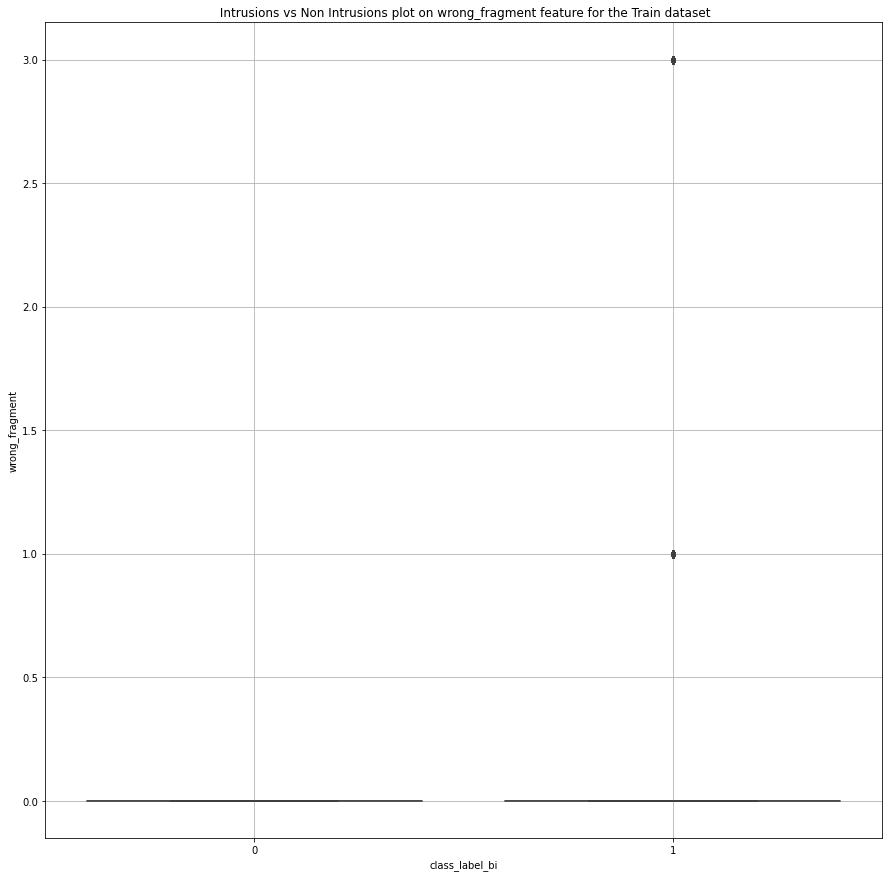

In [37]:
plt.figure(figsize=(15,15))
sns.boxplot(x ='class_label_bi' , y = 'wrong_fragment' , data = df_train )
plt.title(" Intrusions vs Non Intrusions plot on wrong_fragment feature for the Train dataset")
plt.grid()
plt.show()

#### Observation

* There is no fluctuation in both the class labels 0 and 1.

* Only a few outlier points are present in class label 1.

In [38]:
for i in range(0,100,10):
    # take all the value of duration column
    var = df_train['wrong_fragment'].values
    # falttend them and sort in ascending order
    var = np.sort(var , axis= None)
    # formula to calculate percentile "int(len(var)*float(i)/100"
    print("{} percentile value {}".format(i,var[int(len(var)*float(i)/100)]))
print("100 percentile value is ",var[-1])

print( "---------------------------------------------------------------------------")

#calculating speed values at each percntile 90,91,92,93,94,95,96,97,98,99,100
for i in range(90,100):
    var = df_train['wrong_fragment'].values
    var = np.sort(var,axis = None)
    print("{} percentile value is {}".format(i,var[int(len(var)*(float(i)/100))]))
print("100 percentile value is ",var[-1])

print( "---------------------------------------------------------------------------")

#calculating speed values at each percntile 99.0,99.1,99.2,99.3,99.4,99.5,99.6,99.7,99.8,99.9,100
for i in np.arange(0.0, 1.0, 0.1):
    var = df_train['wrong_fragment'].values
    var = np.sort(var,axis = None)
    print("{} percentile value is {}".format(99+i,var[int(len(var)*(float(99+i)/100))]))
print("100 percentile value is ",var[-1])

0 percentile value 0
10 percentile value 0
20 percentile value 0
30 percentile value 0
40 percentile value 0
50 percentile value 0
60 percentile value 0
70 percentile value 0
80 percentile value 0
90 percentile value 0
100 percentile value is  3
---------------------------------------------------------------------------
90 percentile value is 0
91 percentile value is 0
92 percentile value is 0
93 percentile value is 0
94 percentile value is 0
95 percentile value is 0
96 percentile value is 0
97 percentile value is 0
98 percentile value is 0
99 percentile value is 0
100 percentile value is  3
---------------------------------------------------------------------------
99.0 percentile value is 0
99.1 percentile value is 0
99.2 percentile value is 0
99.3 percentile value is 0
99.4 percentile value is 0
99.5 percentile value is 0
99.6 percentile value is 0
99.7 percentile value is 0
99.8 percentile value is 0
99.9 percentile value is 1
100 percentile value is  3


#### Observation

* All the data looks good, only there are small fluctuations in 99.9th and 100th percentiles.

#### Test Data

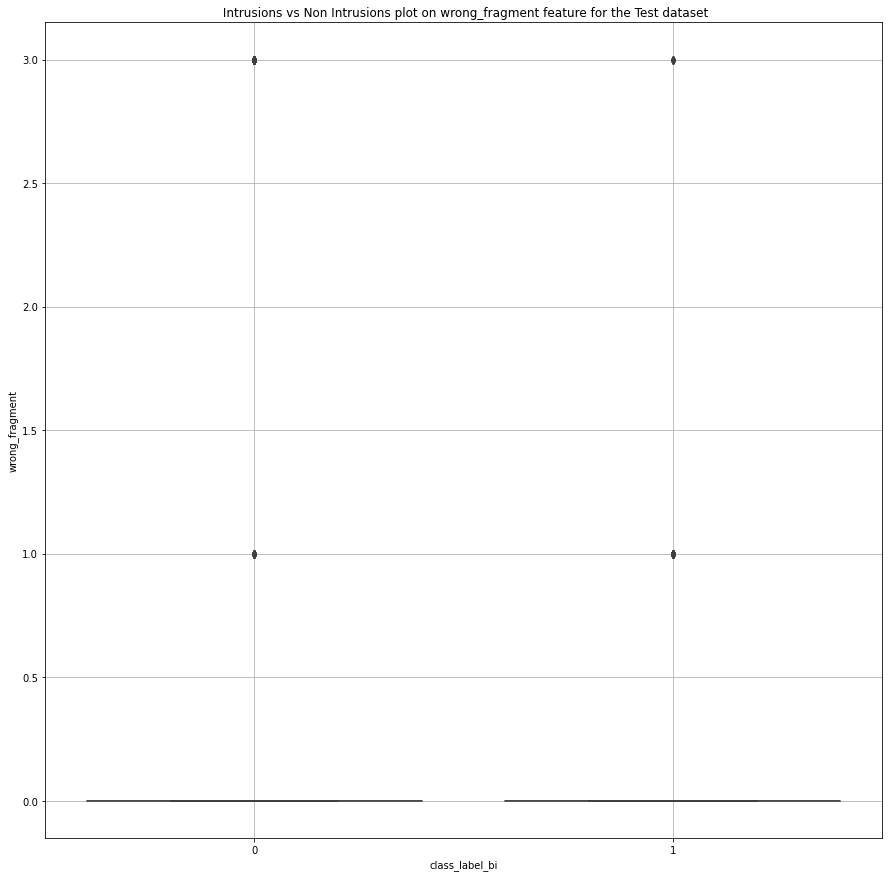

In [39]:
plt.figure(figsize=(15,15))
sns.boxplot(x ='class_label_bi' , y = 'wrong_fragment' , data = df_test )
plt.title(" Intrusions vs Non Intrusions plot on wrong_fragment feature for the Test dataset")
plt.grid()
plt.show()

#### Observation

* Data looks well balanced.

In [40]:
for i in range(0,100,10):
    # take all the value of duration column
    var = df_test['wrong_fragment'].values
    # falttend them and sort in ascending order
    var = np.sort(var , axis= None)
    # formula to calculate percentile "int(len(var)*float(i)/100"
    print("{} percentile value {}".format(i,var[int(len(var)*float(i)/100)]))
print("100 percentile value is ",var[-1])

print( "---------------------------------------------------------------------------")

#calculating speed values at each percntile 90,91,92,93,94,95,96,97,98,99,100
for i in range(90,100):
    var = df_test['wrong_fragment'].values
    var = np.sort(var,axis = None)
    print("{} percentile value is {}".format(i,var[int(len(var)*(float(i)/100))]))
print("100 percentile value is ",var[-1])

print( "---------------------------------------------------------------------------")

#calculating speed values at each percntile 99.0,99.1,99.2,99.3,99.4,99.5,99.6,99.7,99.8,99.9,100
for i in np.arange(0.0, 1.0, 0.1):
    var = df_test['wrong_fragment'].values
    var = np.sort(var,axis = None)
    print("{} percentile value is {}".format(99+i,var[int(len(var)*(float(99+i)/100))]))
print("100 percentile value is ",var[-1])




0 percentile value 0
10 percentile value 0
20 percentile value 0
30 percentile value 0
40 percentile value 0
50 percentile value 0
60 percentile value 0
70 percentile value 0
80 percentile value 0
90 percentile value 0
100 percentile value is  3
---------------------------------------------------------------------------
90 percentile value is 0
91 percentile value is 0
92 percentile value is 0
93 percentile value is 0
94 percentile value is 0
95 percentile value is 0
96 percentile value is 0
97 percentile value is 0
98 percentile value is 0
99 percentile value is 0
100 percentile value is  3
---------------------------------------------------------------------------
99.0 percentile value is 0
99.1 percentile value is 0
99.2 percentile value is 0
99.3 percentile value is 0
99.4 percentile value is 0
99.5 percentile value is 0
99.6 percentile value is 0
99.7 percentile value is 0
99.8 percentile value is 0
99.9 percentile value is 1
100 percentile value is  3


#### Observation

* All the data looks good, only there are small fluctuations in 99.9th and 100th percentiles.

### Applying PCA technique on train and test data for all the continuous features

In [8]:
continuous_features=["duration","src_bytes",
    "dst_bytes","wrong_fragment","urgent","hot","num_failed_logins","num_compromised","num_root",
    "num_file_creations","num_shells","num_access_files","num_outbound_cmds","count","srv_count","serror_rate",
    "srv_serror_rate","rerror_rate","srv_rerror_rate","same_srv_rate",
    "diff_srv_rate","srv_diff_host_rate","dst_host_count","dst_host_srv_count",
    "dst_host_same_srv_rate","dst_host_diff_srv_rate","dst_host_same_src_port_rate",
    "dst_host_srv_diff_host_rate","dst_host_serror_rate","dst_host_srv_serror_rate",
    "dst_host_rerror_rate","dst_host_srv_rerror_rate"]


#### Train Dataset

In [9]:
from sklearn.preprocessing import MinMaxScaler

#Transform features by scaling each feature to 0,1 range.
X = MinMaxScaler()

X  = X.fit_transform(df_train[continuous_features])
y = df_train['class_label_bi'].values

In [10]:
#Principal component analysis (PCA)
pca_train = decomposition.PCA(n_components=2).fit_transform(X)


print("shape of pca_reduced.shape = ", pca_train.shape)


shape of pca_reduced.shape =  (950470, 2)


C:\ProgramData\Anaconda3\lib\site-packages\seaborn\axisgrid.py:316: UserWarning: The `size` parameter has been renamed to `height`; please update your code.
  warnings.warn(msg, UserWarning)


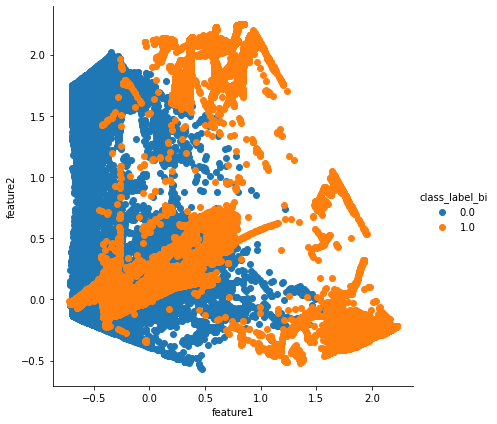

In [11]:
#function is used to stack the sequence of input arrays vertically to make a single array.
pca_train = np.vstack((pca_train.T, y)).T


#Creating dataframe to plot the data
pca_df = pd.DataFrame(data=pca_train, columns=('feature1', 'feature2', 'class_label_bi'))

#Using FacetGrid for plotting conditional relationships between two features.
sns.FacetGrid(pca_df, hue="class_label_bi", size=6).map(plt.scatter, 'feature1', 'feature2').add_legend()

plt.show()

#### Observation


* Data is well separated, very little data is overlapping.

* Class label 0 or non-intrusion based signal has more majority.

#### Test Dataset

In [19]:
from sklearn.preprocessing import MinMaxScaler

#Transform features by scaling each feature to 0,1 range.
X = MinMaxScaler()

X  = X.fit_transform(df_test[continuous_features])
y = df_test['class_label_bi'].values

In [20]:
#Principal component analysis (PCA)
pca_test = decomposition.PCA(n_components=2).fit_transform(X)


print("shape of pca_reduced.shape = ", pca_test.shape)


shape of pca_reduced.shape =  (66436, 2)


C:\ProgramData\Anaconda3\lib\site-packages\seaborn\axisgrid.py:316: UserWarning: The `size` parameter has been renamed to `height`; please update your code.
  warnings.warn(msg, UserWarning)


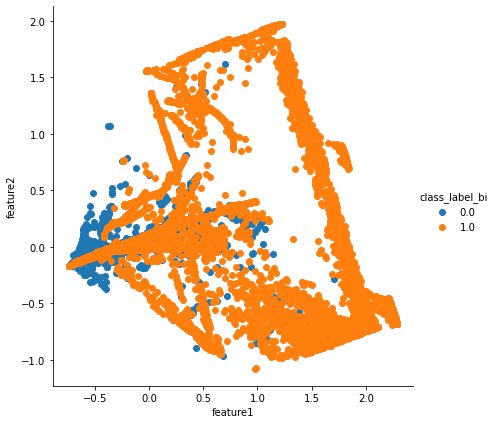

In [21]:
#function is used to stack the sequence of input arrays vertically to make a single array.
pca_test = np.vstack((pca_test.T, y)).T


#Creating dataframe to plot the data
pca_df = pd.DataFrame(data=pca_test, columns=('feature1', 'feature2', 'class_label_bi'))

#Using FacetGrid for plotting conditional relationships between two features.
sns.FacetGrid(pca_df, hue="class_label_bi", size=6).map(plt.scatter, 'feature1', 'feature2').add_legend()

plt.show()

#### Observation


* Data is not well seperated, very large number of data is overlapping.

* Class label 1 or intrusion based signal has more majority.

### Applying TSNE technique on train and test data for all the continuous features

#### Train Dataset

In [23]:
from sklearn.preprocessing import MinMaxScaler

#Transform features by scaling each feature to 0,1 range.
X = MinMaxScaler()

X  = X.fit_transform(df_train[continuous_features])
y = df_train['class_label_bi'].values

In [24]:
#T-distributed Stochastic Neighbor Embedding.
tsne=TSNE(perplexity=50.0, n_iter=1000).fit_transform(X)

print("shape of tsne_reduced.shape = ", tsne.shape)

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\manifold\_t_sne.py:780: FutureWarning: The default initialization in TSNE will change from 'random' to 'pca' in 1.2.
  warnings.warn(
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\manifold\_t_sne.py:790: FutureWarning: The default learning rate in TSNE will change from 200.0 to 'auto' in 1.2.
  warnings.warn(


shape of tsne_reduced.shape =  (950470, 2)


C:\ProgramData\Anaconda3\lib\site-packages\seaborn\axisgrid.py:316: UserWarning: The `size` parameter has been renamed to `height`; please update your code.
  warnings.warn(msg, UserWarning)


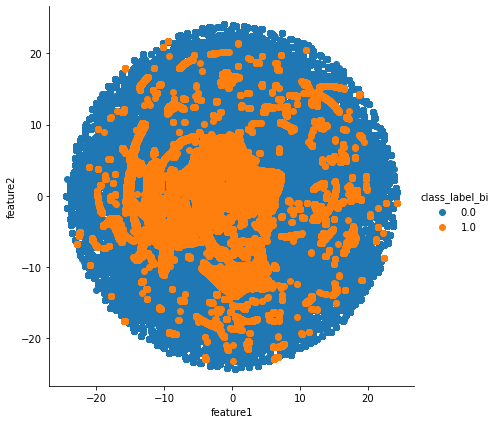

In [25]:
#function is used to stack the sequence of input arrays vertically to make a single array.
tsne = np.vstack((tsne.T, y)).T


#Creating dataframe to plot the data
tsne_df = pd.DataFrame(data=tsne, columns=('feature1', 'feature2', 'class_label_bi'))

#Using FacetGrid for plotting conditional relationships between two features.
sns.FacetGrid(tsne_df, hue="class_label_bi", size=6).map(plt.scatter, 'feature1', 'feature2').add_legend()

plt.show()

#### Observation


* Data is well separated, very less number of data is overlapped.

* Class label 0 or non-intrusion based signal has more majority.

#### Test Dataset

In [27]:
from sklearn.preprocessing import MinMaxScaler

#Transform features by scaling each feature to 0,1 range.
X = MinMaxScaler()

X  = X.fit_transform(df_test[continuous_features])
y = df_test['class_label_bi'].values

In [28]:
#T-distributed Stochastic Neighbor Embedding.
tsne=TSNE(perplexity=50.0, n_iter=1000).fit_transform(X)

print("shape of tsne_reduced.shape = ", tsne.shape)

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\manifold\_t_sne.py:780: FutureWarning: The default initialization in TSNE will change from 'random' to 'pca' in 1.2.
  warnings.warn(
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\manifold\_t_sne.py:790: FutureWarning: The default learning rate in TSNE will change from 200.0 to 'auto' in 1.2.
  warnings.warn(


shape of tsne_reduced.shape =  (66436, 2)


C:\ProgramData\Anaconda3\lib\site-packages\seaborn\axisgrid.py:316: UserWarning: The `size` parameter has been renamed to `height`; please update your code.
  warnings.warn(msg, UserWarning)


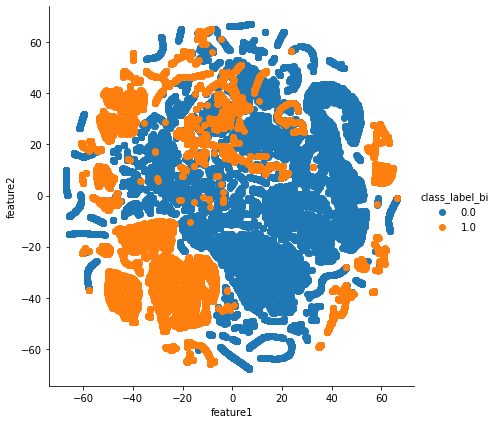

In [29]:
#function is used to stack the sequence of input arrays vertically to make a single array.
tsne = np.vstack((tsne.T, y)).T


#Creating dataframe to plot the data
tsne_df = pd.DataFrame(data=tsne, columns=('feature1', 'feature2', 'class_label_bi'))

#Using FacetGrid for plotting conditional relationships between two features.
sns.FacetGrid(tsne_df, hue="class_label_bi", size=6).map(plt.scatter, 'feature1', 'feature2').add_legend()

plt.show()

#### Observation

* Data is well separated, very less number of data is overlapped.

* Class label 0 or non-intrusion based signal has more majority.

### Cluster

#### Train Dataset

In [35]:
#Transform features by scaling each feature to 0,1 range.
X = MinMaxScaler()

X  = X.fit_transform(df_train[continuous_features])
y = df_train['class_label_bi'].values

In [38]:
from sklearn.cluster import MiniBatchKMeans

#Mini-Batch K-Means clustering.
kmeans = MiniBatchKMeans(n_clusters=2).fit_transform(X)

print("shape of cluster reduced shape = ", kmeans.shape)

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:1046: UserWarning: MiniBatchKMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can prevent it by setting batch_size >= 2048 or by setting the environment variable OMP_NUM_THREADS=4
  warnings.warn(


shape of cluster reduced shape =  (950470, 2)


C:\ProgramData\Anaconda3\lib\site-packages\seaborn\axisgrid.py:316: UserWarning: The `size` parameter has been renamed to `height`; please update your code.
  warnings.warn(msg, UserWarning)


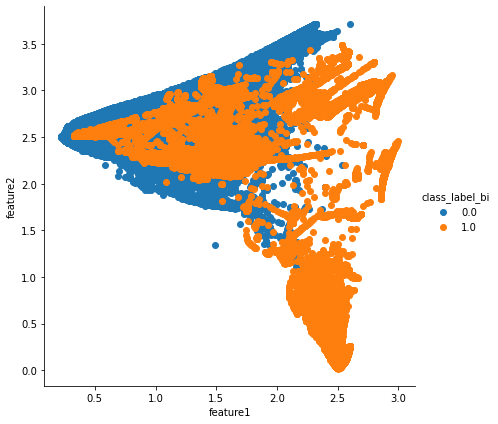

In [39]:
#function is used to stack the sequence of input arrays vertically to make a single array.
kmeans = np.vstack((kmeans.T, y)).T


#Creating dataframe to plot the data
kmeans_df = pd.DataFrame(data=kmeans, columns=('feature1', 'feature2', 'class_label_bi'))

#Using FacetGrid for plotting conditional relationships between two features.
sns.FacetGrid(kmeans_df, hue="class_label_bi", size=6).map(plt.scatter, 'feature1', 'feature2').add_legend()

plt.show()

#### Observation


* A large number of data is overlapped.
* Class label 1 or intrusion based signal has more majority.

#### Test Dataset

In [43]:
#Transform features by scaling each feature to 0,1 range.
X = MinMaxScaler()

X  = X.fit_transform(df_test[continuous_features])
y = df_test['class_label_bi'].values

In [44]:
Mini-Batch K-Means clustering.
kmeans = MiniBatchKMeans(n_clusters=2).fit_transform(X)

print("shape of cluster reduced shape = ", kmeans.shape)

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:1046: UserWarning: MiniBatchKMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can prevent it by setting batch_size >= 2048 or by setting the environment variable OMP_NUM_THREADS=4
  warnings.warn(


shape of cluster reduced shape =  (66436, 2)


C:\ProgramData\Anaconda3\lib\site-packages\seaborn\axisgrid.py:316: UserWarning: The `size` parameter has been renamed to `height`; please update your code.
  warnings.warn(msg, UserWarning)


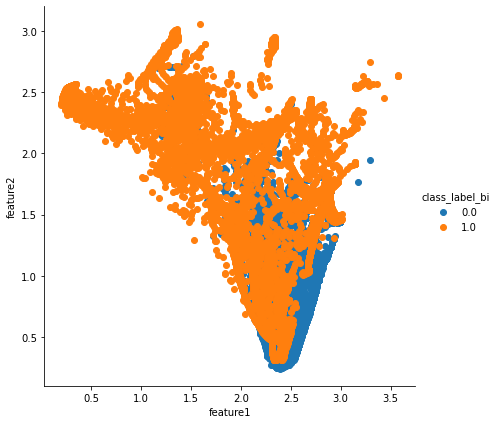

In [45]:
#function is used to stack the sequence of input arrays vertically to make a single array.
kmeans = np.vstack((kmeans.T, y)).T


#Creating dataframe to plot the data
kmeans_df = pd.DataFrame(data=kmeans, columns=('feature1', 'feature2', 'class_label_bi'))

#Using FacetGrid for plotting conditional relationships between two features.
sns.FacetGrid(kmeans_df, hue="class_label_bi", size=6).map(plt.scatter, 'feature1', 'feature2').add_legend()

plt.show()

#### Observation

* A large number of data is overlapped.

* Class label 1 or intrusion based signal has more majority.

#  Conclusion after Exploratory Data Analysis 

* Both the train and test datasets are highly imbalanced as there are fewer numbers of intrusion signals.


* Train dataset has 2 intrusion that doesn't present in test dataset and test dataset has 17 intrusions that don't present in train dataset which will help us to build a more accurate model on unseen intrusion types.


* We will move further on features engineering and modelling to check, how accurate we can make our model.

## ii) Multiclass Classification Problem

In [2]:
""" Reload the cleaned datasets """

df_train=pd.read_csv("cleaned_train.csv")

df_test=pd.read_csv("cleaned_test.csv")

In [3]:
""" In the below code we have basically divided the intrusions based on the intrusion types
and created a new column class_label_mul with the help of this data based on both the train and the test data frame """

"""
Normal=0
Probing=1
DOS=2
U2R=3
R2L=4

"""


mapping = {'ipsweep.': 1,'satan.': 1,'nmap.': 1,'portsweep.': 1,'saint.': 1,'mscan.': 1,
        'teardrop.': 2,'pod.': 2,'land.': 2,'back.': 2,'neptune.': 2,'smurf.': 2,'mailbomb.': 2,
        'udpstorm.': 2,'apache2.': 2,'processtable.': 2,
        'perl.': 3,'loadmodule.': 3,'rootkit.': 3,'buffer_overflow.': 3,'xterm.': 3,'ps.': 3,
        'sqlattack.': 3,'httptunnel.': 3,
        'ftp_write.': 4,'phf.': 4,'guess_passwd.': 4,'warezmaster.': 4,'warezclient.': 4,'imap.': 4,
        'spy.': 4,'multihop.': 4,'named.': 4,'snmpguess.': 4,'worm.': 4,'snmpgetattack.': 4,
        'xsnoop.': 4,'xlock.': 4,'sendmail.': 4,
        'normal.': 0
        }

df_train['class_label_mul'] = df_train['class_label'].apply(lambda i: mapping[i])
df_test['class_label_mul'] = df_test['class_label'].apply(lambda i: mapping[i])

In [4]:
# Dropping Non intrusion type class label or class label type 0.

df_train=df_train[df_train.class_label_mul != 0]

df_test=df_test[df_test.class_label_mul != 0]

In [5]:
df_train.head(5)

,duration,protocol_type,service,flag,src_bytes,dst_bytes,land,wrong_fragment,urgent,hot,num_failed_logins,logged_in,num_compromised,root_shell,su_attempted,num_root,num_file_creations,num_shells,num_access_files,num_outbound_cmds,is_host_login,is_guest_login,count,srv_count,serror_rate,srv_serror_rate,rerror_rate,srv_rerror_rate,same_srv_rate,diff_srv_rate,srv_diff_host_rate,dst_host_count,dst_host_srv_count,dst_host_same_srv_rate,dst_host_diff_srv_rate,dst_host_same_src_port_rate,dst_host_srv_diff_host_rate,dst_host_serror_rate,dst_host_srv_serror_rate,dst_host_rerror_rate,dst_host_srv_rerror_rate,class_label,class_label_mul
6642,184,tcp,telnet,SF,1511,2957,0,0,0,3,0,1,2,1,0,0,1,0,0,0,0,0,1,1,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1,3,1.00,0.00,1.00,0.67,0.0,0.0,0.0,0.0,buffer_overflow.,3
6643,305,tcp,telnet,SF,1735,2766,0,0,0,3,0,1,2,1,0,0,1,0,0,0,0,0,1,1,0.0,0.0,0.0,0.0,1.0,0.0,0.0,2,4,1.00,0.00,0.50,0.50,0.0,0.0,0.0,0.0,buffer_overflow.,3
35231,79,tcp,telnet,SF,281,1301,0,0,0,2,0,1,1,1,0,0,4,2,0,0,0,0,1,1,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1,10,1.00,0.00,1.00,0.30,0.0,0.0,0.0,0.1,loadmodule.,3
35863,25,tcp,telnet,SF,269,2333,0,0,0,0,0,1,0,1,0,2,2,1,0,0,0,0,1,1,0.0,0.0,0.0,0.0,1.0,0.0,0.0,69,2,0.03,0.06,0.01,0.00,0.0,0.0,0.0,0.0,perl.,3
66757,0,tcp,telnet,S0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,2,1,0.5,1.0,0.0,0.0,0.5,1.0,0.0,1,2,1.00,0.00,1.00,1.00,1.0,0.5,0.0,0.0,neptune.,2


In [6]:
df_test.head(5)

,duration,protocol_type,service,flag,src_bytes,dst_bytes,land,wrong_fragment,urgent,hot,num_failed_logins,logged_in,num_compromised,root_shell,su_attempted,num_root,num_file_creations,num_shells,num_access_files,num_outbound_cmds,is_host_login,is_guest_login,count,srv_count,serror_rate,srv_serror_rate,rerror_rate,srv_rerror_rate,same_srv_rate,diff_srv_rate,srv_diff_host_rate,dst_host_count,dst_host_srv_count,dst_host_same_srv_rate,dst_host_diff_srv_rate,dst_host_same_src_port_rate,dst_host_srv_diff_host_rate,dst_host_serror_rate,dst_host_srv_serror_rate,dst_host_rerror_rate,dst_host_srv_rerror_rate,class_label,class_label_mul
276,707,tcp,domain,SF,1562,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,1,0.0,0.0,0.0,0.0,1.0,0.0,0.0,255,1,0.00,0.02,0.00,0.0,0.0,0.0,0.0,0.0,named.,4
277,703,tcp,X11,SF,57164,35576,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,1,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1,1,1.00,0.00,1.00,0.0,0.0,0.0,0.0,0.0,named.,4
378,199,tcp,X11,SF,56124,17588,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,1,0.0,0.0,0.0,0.0,1.0,0.0,0.0,255,1,0.00,0.01,0.00,0.0,0.0,0.0,0.0,0.0,xlock.,4
396,0,udp,private,SF,105,145,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,2,2,0.0,0.0,0.0,0.0,1.0,0.0,0.0,255,254,1.00,0.01,0.01,0.0,0.0,0.0,0.0,0.0,snmpgetattack.,4
401,433,tcp,X11,SF,31645608,207796,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,1,0.0,0.0,0.0,0.0,1.0,0.0,0.0,255,2,0.01,0.02,0.00,0.0,0.0,0.0,0.0,0.0,xlock.,4


In [7]:
df_train.shape , df_test.shape

((172053, 43), (19211, 43))

<h3> Comparison of Intrusion vs Non Intrusion plot </h3>

#### Train dataset

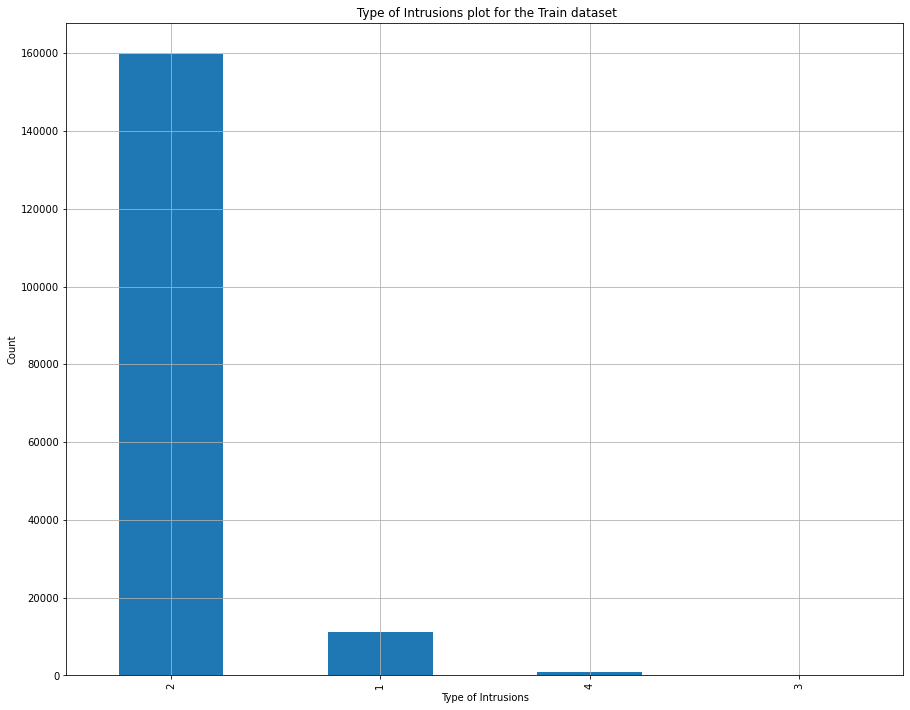

In [8]:
plt.figure(figsize=(15,12))
val = df_train['class_label_mul'].value_counts()
val.plot(kind='bar')
plt.ylabel('Count')
plt.xlabel('Type of Intrusions')
plt.title(' Type of Intrusions plot for the Train dataset')
plt.grid()
plt.show()

#### Test dataset

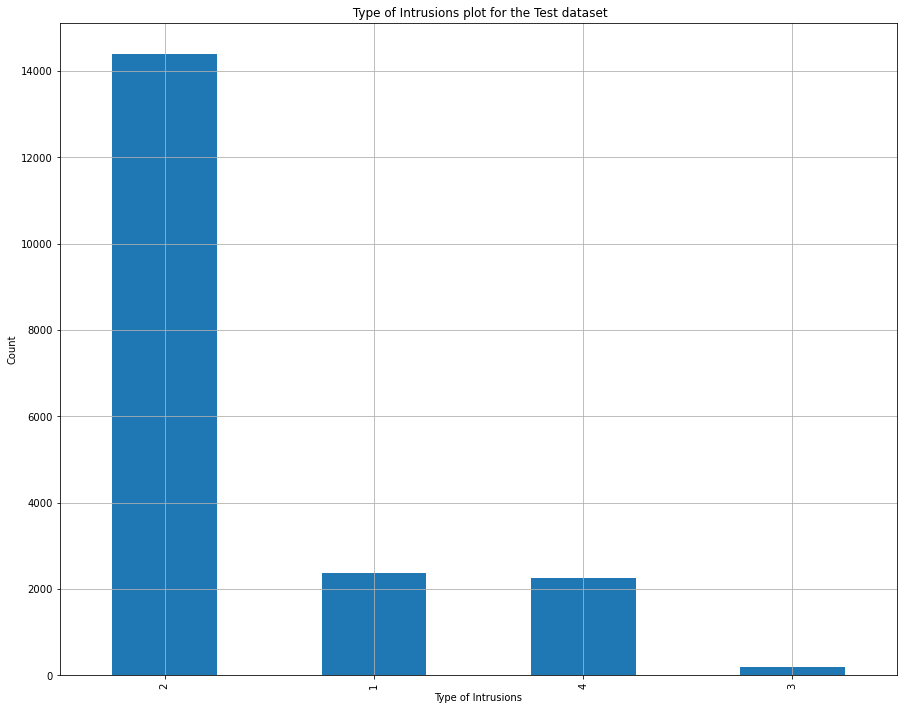

In [9]:
plt.figure(figsize=(15,12))
val = df_test['class_label_mul'].value_counts()
val.plot(kind='bar')
plt.ylabel('Count')
plt.xlabel('Type of Intrusions')
plt.title(' Type of Intrusions plot for the Test dataset')
plt.grid()
plt.show()

#### Observation


* We can clearly see Dos type intrusion has more dominance in both the datasets


## Data Analysis on catagorical and continous features for both the train and test dataset

### Catagorical or discrete Features

####  protocol_type

#### Train dataset

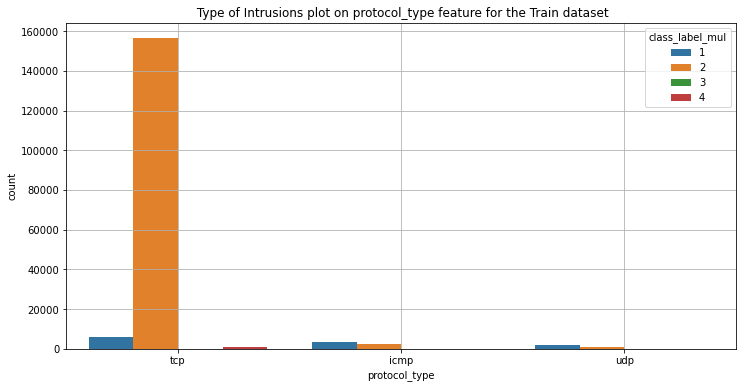

In [10]:
plt.subplots(figsize=(12,6))
sns.countplot(x = 'protocol_type' , data = df_train , hue = 'class_label_mul')
plt.title(" Type of Intrusions plot on protocol_type feature for the Train dataset")
plt.grid()
plt.show()

#### Test Dataset

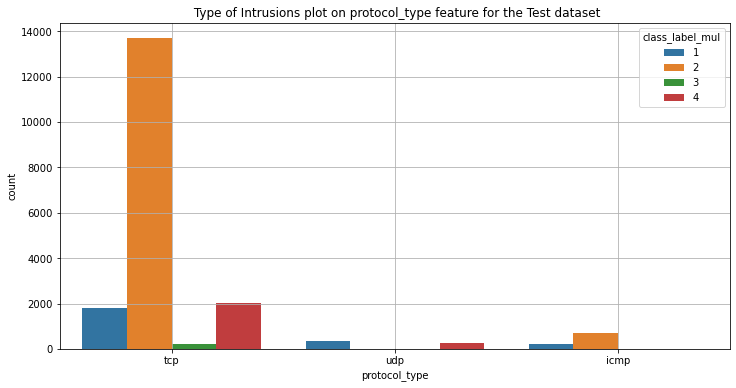

In [11]:
plt.subplots(figsize=(12,6))
sns.countplot(x = 'protocol_type' , data = df_test , hue = 'class_label_mul')
plt.title(" Type of Intrusions plot on protocol_type feature for the Test dataset")
plt.grid()
plt.show()

### service

#### Train Data

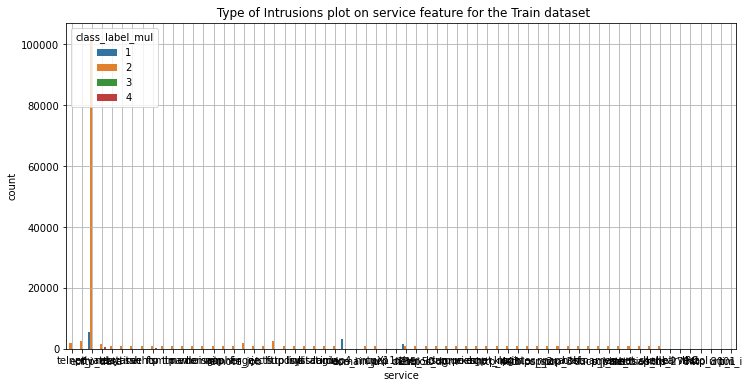

In [12]:
plt.subplots(figsize=(12,6))
sns.countplot(x = 'service' , data = df_train , hue = 'class_label_mul')
plt.title(" Type of Intrusions plot on service feature for the Train dataset")
plt.grid()
plt.show()

#### Test Data

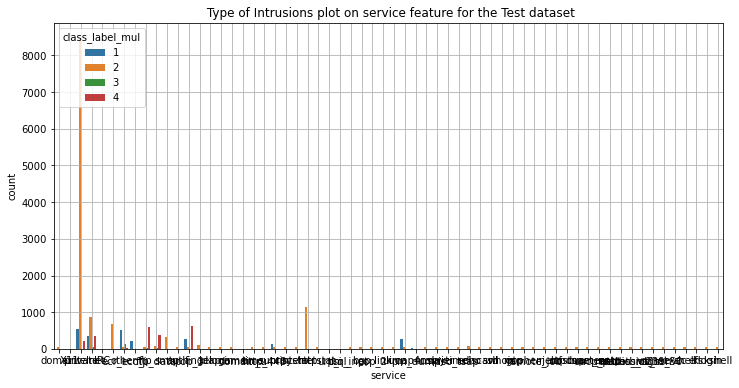

In [13]:
plt.subplots(figsize=(12,6))
sns.countplot(x = 'service' , data = df_test , hue = 'class_label_mul')
plt.title(" Type of Intrusions plot on service feature for the Test dataset")
plt.grid()
plt.show()

### Flag

#### Train Data

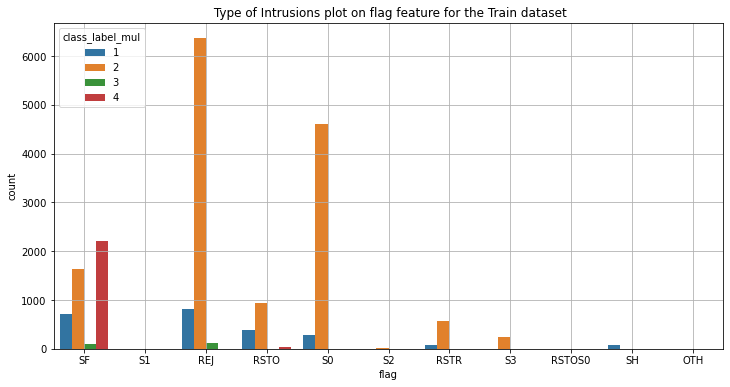

In [14]:
plt.subplots(figsize=(12,6))
sns.countplot(x = 'flag' , data = df_test , hue = 'class_label_mul')
plt.title(" Type of Intrusions plot on flag feature for the Train dataset")
plt.grid()
plt.show()

#### Test Data

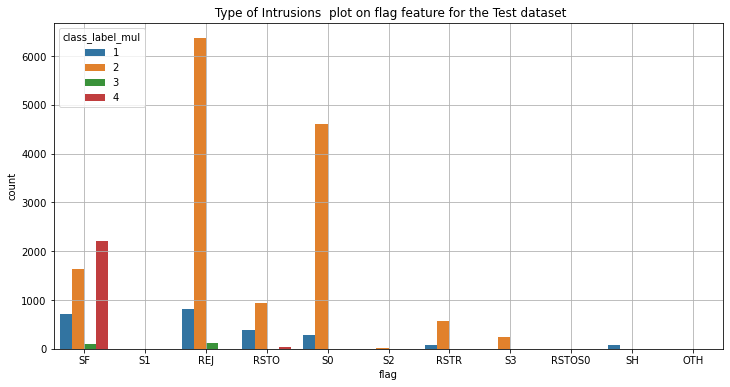

In [15]:
plt.subplots(figsize=(12,6))
sns.countplot(x = 'flag' , data = df_test , hue = 'class_label_mul')
plt.title(" Type of Intrusions  plot on flag feature for the Test dataset")
plt.grid()
plt.show()

#### Overall Observation for categorical features


* DOS type Intrusion is highly present in both the train and test datasets.

* TCP port has received more intrusion for protocol_type feature.

* For service features, DOS type intrusion is highly present.

* For the Flag feature, SF has received more number of R2L type intrusion, Rest of them have received more number of DOS type intrusion


### Applying PCA technique on train and test data for all the continuous features

In [16]:
continuous_features=["duration","src_bytes",
    "dst_bytes","wrong_fragment","urgent","hot","num_failed_logins","num_compromised","num_root",
    "num_file_creations","num_shells","num_access_files","num_outbound_cmds","count","srv_count","serror_rate",
    "srv_serror_rate","rerror_rate","srv_rerror_rate","same_srv_rate",
    "diff_srv_rate","srv_diff_host_rate","dst_host_count","dst_host_srv_count",
    "dst_host_same_srv_rate","dst_host_diff_srv_rate","dst_host_same_src_port_rate",
    "dst_host_srv_diff_host_rate","dst_host_serror_rate","dst_host_srv_serror_rate",
    "dst_host_rerror_rate","dst_host_srv_rerror_rate"]


#### Train Dataset

In [17]:
from sklearn.preprocessing import MinMaxScaler

#Transform features by scaling each feature to 0,1 range.
X = MinMaxScaler()

X  = X.fit_transform(df_train[continuous_features])
y = df_train['class_label_mul'].values

In [18]:
#Principal component analysis (PCA)
pca_train = decomposition.PCA(n_components=2).fit_transform(X)


print("shape of pca_reduced.shape = ", pca_train.shape)


shape of pca_reduced.shape =  (172053, 2)


C:\ProgramData\Anaconda3\lib\site-packages\seaborn\axisgrid.py:316: UserWarning: The `size` parameter has been renamed to `height`; please update your code.
  warnings.warn(msg, UserWarning)


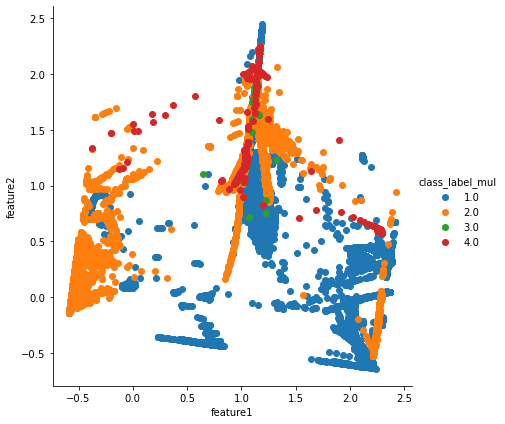

In [19]:
#function is used to stack the sequence of input arrays vertically to make a single array.
pca_train = np.vstack((pca_train.T, y)).T


#Creating dataframe to plot the data
pca_df = pd.DataFrame(data=pca_train, columns=('feature1', 'feature2', 'class_label_mul'))

#Using FacetGrid for plotting conditional relationships between two features.
sns.FacetGrid(pca_df, hue="class_label_mul", size=6).map(plt.scatter, 'feature1', 'feature2').add_legend()

plt.show()

#### Observation


* Data is not well separated, more data are overlapping.

* Probing, DOS type intrusions are occurs more in the PCA model.

#### Test Dataset

In [21]:
from sklearn.preprocessing import MinMaxScaler

#Transform features by scaling each feature to 0,1 range.
X = MinMaxScaler()

X  = X.fit_transform(df_test[continuous_features])
y = df_test['class_label_mul'].values

In [22]:
#Principal component analysis (PCA)
pca_test = decomposition.PCA(n_components=2).fit_transform(X)


print("shape of pca_reduced.shape = ", pca_test.shape)


shape of pca_reduced.shape =  (19211, 2)


C:\ProgramData\Anaconda3\lib\site-packages\seaborn\axisgrid.py:316: UserWarning: The `size` parameter has been renamed to `height`; please update your code.
  warnings.warn(msg, UserWarning)


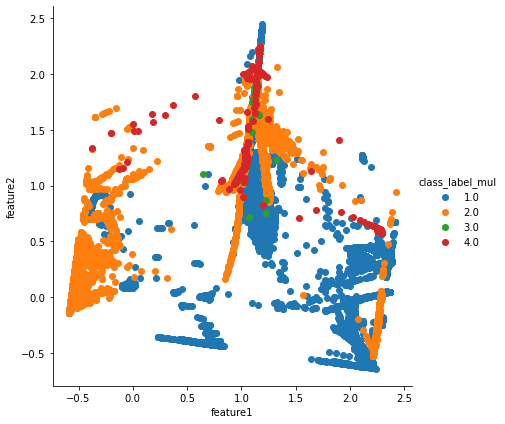

In [23]:
#function is used to stack the sequence of input arrays vertically to make a single array.
pca_test = np.vstack((pca_test.T, y)).T


#Creating dataframe to plot the data
pca_df = pd.DataFrame(data=pca_train, columns=('feature1', 'feature2', 'class_label_mul'))

#Using FacetGrid for plotting conditional relationships between two features.
sns.FacetGrid(pca_df, hue="class_label_mul", size=6).map(plt.scatter, 'feature1', 'feature2').add_legend()

plt.show()

#### Observation


* Data is not well separated, more data are overlapping.

* Probing, DOS type intrusions are occurs more in the PCA model.

### Applying TSNE technique on train and test data for all the continuous features

### TSNE (perplexity = 50)

#### Train Dataset

In [25]:
from sklearn.preprocessing import MinMaxScaler

#Transform features by scaling each feature to 0,1 range.
X = MinMaxScaler()

X  = X.fit_transform(df_train[continuous_features])
y = df_train['class_label_mul'].values

In [26]:
#T-distributed Stochastic Neighbor Embedding
tsne=TSNE(perplexity=50.0, n_iter=1000).fit_transform(X)

print("shape of tsne_reduced.shape = ", tsne.shape)

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\manifold\_t_sne.py:780: FutureWarning: The default initialization in TSNE will change from 'random' to 'pca' in 1.2.
  warnings.warn(
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\manifold\_t_sne.py:790: FutureWarning: The default learning rate in TSNE will change from 200.0 to 'auto' in 1.2.
  warnings.warn(


shape of tsne_reduced.shape =  (172053, 2)


C:\ProgramData\Anaconda3\lib\site-packages\seaborn\axisgrid.py:316: UserWarning: The `size` parameter has been renamed to `height`; please update your code.
  warnings.warn(msg, UserWarning)


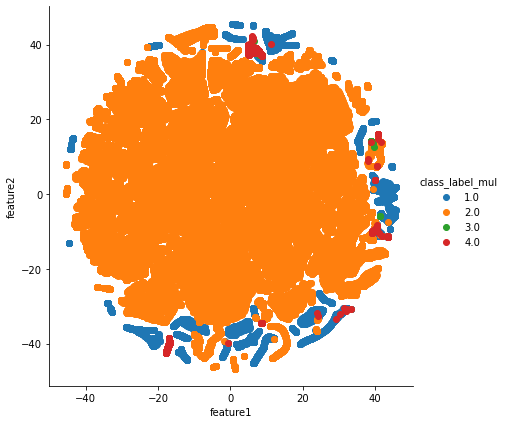

In [27]:
#function is used to stack the sequence of input arrays vertically to make a single array.
tsne = np.vstack((tsne.T, y)).T


#Creating dataframe to plot the data
tsne_df = pd.DataFrame(data=tsne, columns=('feature1', 'feature2', 'class_label_mul'))

#Using FacetGrid for plotting conditional relationships between two features.
sns.FacetGrid(tsne_df, hue="class_label_mul", size=6).map(plt.scatter, 'feature1', 'feature2').add_legend()

plt.show()

#### Observation


* Data is not well separated, a huge number of data is overlapped.

* DOS type intrusion has more majority.

#### Test Dataset

In [29]:
from sklearn.preprocessing import MinMaxScaler

#Transform features by scaling each feature to 0,1 range.
X = MinMaxScaler()

X  = X.fit_transform(df_test[continuous_features])
y = df_test['class_label_mul'].values

In [30]:
#T-distributed Stochastic Neighbor Embedding
tsne=TSNE(perplexity=50.0, n_iter=1000).fit_transform(X)

print("shape of tsne_reduced.shape = ", tsne.shape)

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\manifold\_t_sne.py:780: FutureWarning: The default initialization in TSNE will change from 'random' to 'pca' in 1.2.
  warnings.warn(
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\manifold\_t_sne.py:790: FutureWarning: The default learning rate in TSNE will change from 200.0 to 'auto' in 1.2.
  warnings.warn(


shape of tsne_reduced.shape =  (19211, 2)


C:\ProgramData\Anaconda3\lib\site-packages\seaborn\axisgrid.py:316: UserWarning: The `size` parameter has been renamed to `height`; please update your code.
  warnings.warn(msg, UserWarning)


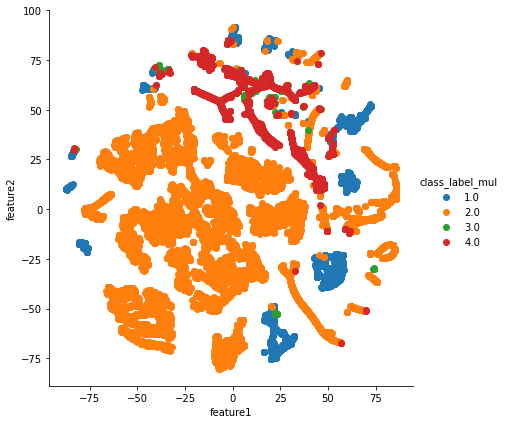

In [31]:
#function is used to stack the sequence of input arrays vertically to make a single array.
tsne = np.vstack((tsne.T, y)).T


#Creating dataframe to plot the data
tsne_df = pd.DataFrame(data=tsne, columns=('feature1', 'feature2', 'class_label_mul'))

#Using FacetGrid for plotting conditional relationships between two features.
sns.FacetGrid(tsne_df, hue="class_label_mul", size=6).map(plt.scatter, 'feature1', 'feature2').add_legend()

plt.show()

#### Observation


* Data is well separated, very less number of data is overlapped.

* DOS type intrusion has more majority.

### Cluster

#### Train Dataset

In [45]:
#Transform features by scaling each feature to 0,1 range.
X = MinMaxScaler()

X  = X.fit_transform(df_train[continuous_features])
y = df_train['class_label_mul'].values

In [46]:
from sklearn.cluster import MiniBatchKMeans

#Mini-Batch K-Means clustering.
kmeans = MiniBatchKMeans(n_clusters=2).fit_transform(X)

print("shape of cluster reduced shape = ", kmeans.shape)

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:1046: UserWarning: MiniBatchKMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can prevent it by setting batch_size >= 2048 or by setting the environment variable OMP_NUM_THREADS=4
  warnings.warn(


shape of cluster reduced shape =  (172053, 2)


C:\ProgramData\Anaconda3\lib\site-packages\seaborn\axisgrid.py:316: UserWarning: The `size` parameter has been renamed to `height`; please update your code.
  warnings.warn(msg, UserWarning)


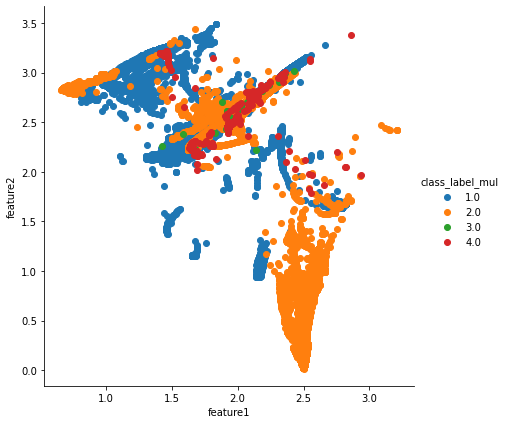

In [47]:
#function is used to stack the sequence of input arrays vertically to make a single array.
kmeans = np.vstack((kmeans.T, y)).T


#Creating dataframe to plot the data
kmeans_df = pd.DataFrame(data=kmeans, columns=('feature1', 'feature2', 'class_label_mul'))

#Using FacetGrid for plotting conditional relationships between two features.
sns.FacetGrid(kmeans_df, hue="class_label_mul", size=6).map(plt.scatter, 'feature1', 'feature2').add_legend()

plt.show()

#### Test Dataset

In [49]:
#Transform features by scaling each feature to 0,1 range.
X = MinMaxScaler()

X  = X.fit_transform(df_test[continuous_features])
y = df_test['class_label_mul'].values

In [50]:
from sklearn.cluster import MiniBatchKMeans

#Mini-Batch K-Means clustering.
kmeans = MiniBatchKMeans(n_clusters=2).fit_transform(X)

print("shape of cluster reduced shape = ", kmeans.shape)

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:1046: UserWarning: MiniBatchKMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can prevent it by setting batch_size >= 2048 or by setting the environment variable OMP_NUM_THREADS=4
  warnings.warn(


shape of cluster reduced shape =  (19211, 2)


C:\ProgramData\Anaconda3\lib\site-packages\seaborn\axisgrid.py:316: UserWarning: The `size` parameter has been renamed to `height`; please update your code.
  warnings.warn(msg, UserWarning)


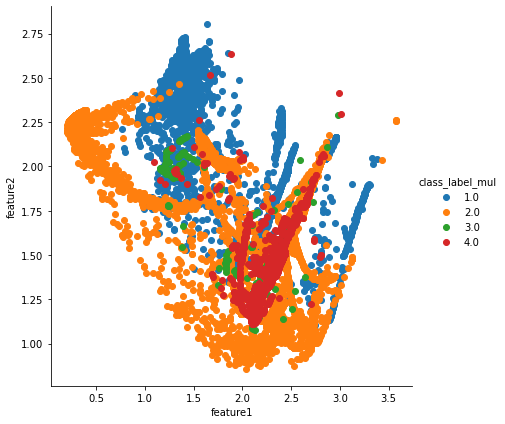

In [51]:
#function is used to stack the sequence of input arrays vertically to make a single array.
kmeans = np.vstack((kmeans.T, y)).T


#Creating dataframe to plot the data
kmeans_df = pd.DataFrame(data=kmeans, columns=('feature1', 'feature2', 'class_label_mul'))

#Using FacetGrid for plotting conditional relationships between two features.
sns.FacetGrid(kmeans_df, hue="class_label_mul", size=6).map(plt.scatter, 'feature1', 'feature2').add_legend()

plt.show()

#### Observation


* Data is overlapped largely.

* DOS type intrusion has more majority.

#  Conclusion after Exploratory Data Analysis 

* DOS type intrusion has more majority in both the train and test datasets 

* We will move further on features engineering and modelling to classify types of intrusion, how accurate we can make our model.